<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#--Récupérer-&amp;-charger-les-données" data-toc-modified-id="--Récupérer-&amp;-charger-les-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>- Récupérer &amp; charger les données</a></span><ul class="toc-item"><li><span><a href="#--Récupérer-le-jeu-de-données" data-toc-modified-id="--Récupérer-le-jeu-de-données-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>- Récupérer le jeu de données</a></span></li><li><span><a href="#--Charger-les-données-dans-le-Notebook" data-toc-modified-id="--Charger-les-données-dans-le-Notebook-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>- Charger les données dans le Notebook</a></span></li><li><span><a href="#--Présentation-du-jeu-de-données" data-toc-modified-id="--Présentation-du-jeu-de-données-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>- Présentation du jeu de données</a></span></li><li><span><a href="#--Quelques-précisions" data-toc-modified-id="--Quelques-précisions-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>- Quelques précisions</a></span></li></ul></li><li><span><a href="#--Nettoyer-&amp;-consolider" data-toc-modified-id="--Nettoyer-&amp;-consolider-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>- Nettoyer &amp; consolider</a></span><ul class="toc-item"><li><span><a href="#--Analyse-rapide-du-fichier" data-toc-modified-id="--Analyse-rapide-du-fichier-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>- Analyse rapide du fichier</a></span></li><li><span><a href="#--Suppression-des-données-trop-incomplètes" data-toc-modified-id="--Suppression-des-données-trop-incomplètes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>- Suppression des données trop incomplètes</a></span></li><li><span><a href="#--Suppression-/-Modification-/-Merge-des-données" data-toc-modified-id="--Suppression-/-Modification-/-Merge-des-données-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>- Suppression / Modification / Merge des données</a></span><ul class="toc-item"><li><span><a href="#--Suppression-des-colonnes-toujours-uniques-/-identiques-(ou-quasi)" data-toc-modified-id="--Suppression-des-colonnes-toujours-uniques-/-identiques-(ou-quasi)-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>- Suppression des colonnes toujours uniques / identiques (ou quasi)</a></span><ul class="toc-item"><li><span><a href="#--Analyse-plus-poussée---IDEMPLACEMENT" data-toc-modified-id="--Analyse-plus-poussée---IDEMPLACEMENT-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>- Analyse plus poussée - IDEMPLACEMENT</a></span></li><li><span><a href="#--Analyse-plus-poussée---STADE-DE-DEVELOPPEMENT" data-toc-modified-id="--Analyse-plus-poussée---STADE-DE-DEVELOPPEMENT-2.3.1.2"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>- Analyse plus poussée - STADE DE DEVELOPPEMENT</a></span></li><li><span><a href="#--Analyse-plus-poussée---REMARQUABLE" data-toc-modified-id="--Analyse-plus-poussée---REMARQUABLE-2.3.1.3"><span class="toc-item-num">2.3.1.3&nbsp;&nbsp;</span>- Analyse plus poussée - REMARQUABLE</a></span></li></ul></li><li><span><a href="#--Suppression-des-colonnes-correspondantes-à-une-autre-(lien-1-1)" data-toc-modified-id="--Suppression-des-colonnes-correspondantes-à-une-autre-(lien-1-1)-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>- Suppression des colonnes correspondantes à une autre (lien 1-1)</a></span></li><li><span><a href="#--Suppression-/-Merge-des-données-trop-peu-représentées" data-toc-modified-id="--Suppression-/-Merge-des-données-trop-peu-représentées-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>- Suppression / Merge des données trop peu représentées</a></span></li><li><span><a href="#--Suppression-des-données-non-utiles" data-toc-modified-id="--Suppression-des-données-non-utiles-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>- Suppression des données non utiles</a></span></li><li><span><a href="#--Analyse-des-données-anormales" data-toc-modified-id="--Analyse-des-données-anormales-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>- Analyse des données anormales</a></span><ul class="toc-item"><li><span><a href="#CIRCONFERENCE-(cm)" data-toc-modified-id="CIRCONFERENCE-(cm)-2.3.5.1"><span class="toc-item-num">2.3.5.1&nbsp;&nbsp;</span>CIRCONFERENCE (cm)</a></span></li><li><span><a href="#HAUTEUR-(m)" data-toc-modified-id="HAUTEUR-(m)-2.3.5.2"><span class="toc-item-num">2.3.5.2&nbsp;&nbsp;</span>HAUTEUR (m)</a></span></li></ul></li><li><span><a href="#--Supprimer-les-données-anormales" data-toc-modified-id="--Supprimer-les-données-anormales-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>- Supprimer les données anormales</a></span><ul class="toc-item"><li><span><a href="#CIRCONFERENCE-(cm)" data-toc-modified-id="CIRCONFERENCE-(cm)-2.3.6.1"><span class="toc-item-num">2.3.6.1&nbsp;&nbsp;</span>CIRCONFERENCE (cm)</a></span></li><li><span><a href="#HAUTEUR-(m)" data-toc-modified-id="HAUTEUR-(m)-2.3.6.2"><span class="toc-item-num">2.3.6.2&nbsp;&nbsp;</span>HAUTEUR (m)</a></span></li></ul></li></ul></li><li><span><a href="#--Compléter-les-données-manquantes-(y.c-celles-égales-à-0)" data-toc-modified-id="--Compléter-les-données-manquantes-(y.c-celles-égales-à-0)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>- Compléter les données manquantes (y.c celles égales à 0)</a></span><ul class="toc-item"><li><span><a href="#--Complétion-de-la-colonne-LIBELLE-FRANCAIS" data-toc-modified-id="--Complétion-de-la-colonne-LIBELLE-FRANCAIS-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>- Complétion de la colonne LIBELLE FRANCAIS</a></span><ul class="toc-item"><li><span><a href="#complétion-avec-le-GENRE" data-toc-modified-id="complétion-avec-le-GENRE-2.4.1.1"><span class="toc-item-num">2.4.1.1&nbsp;&nbsp;</span>complétion avec le GENRE</a></span></li><li><span><a href="#complétion-avec-l'ESPECE" data-toc-modified-id="complétion-avec-l'ESPECE-2.4.1.2"><span class="toc-item-num">2.4.1.2&nbsp;&nbsp;</span>complétion avec l'ESPECE</a></span></li><li><span><a href="#suppression-des-derniers-LIBELLE-FRANCAIS-vides" data-toc-modified-id="suppression-des-derniers-LIBELLE-FRANCAIS-vides-2.4.1.3"><span class="toc-item-num">2.4.1.3&nbsp;&nbsp;</span>suppression des derniers LIBELLE FRANCAIS vides</a></span></li></ul></li><li><span><a href="#--Complétion-de-la-colonne-ESPECE" data-toc-modified-id="--Complétion-de-la-colonne-ESPECE-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>- Complétion de la colonne ESPECE</a></span><ul class="toc-item"><li><span><a href="#complétion-avec-le-LIBELLE-FRANCAIS" data-toc-modified-id="complétion-avec-le-LIBELLE-FRANCAIS-2.4.2.1"><span class="toc-item-num">2.4.2.1&nbsp;&nbsp;</span>complétion avec le LIBELLE FRANCAIS</a></span></li><li><span><a href="#analyse-des-données-ESPECE---pourquoi-si-peu-de-modifications-?" data-toc-modified-id="analyse-des-données-ESPECE---pourquoi-si-peu-de-modifications-?-2.4.2.2"><span class="toc-item-num">2.4.2.2&nbsp;&nbsp;</span>analyse des données ESPECE - pourquoi si peu de modifications ?</a></span></li><li><span><a href="#complétion-des-données-ESPECE" data-toc-modified-id="complétion-des-données-ESPECE-2.4.2.3"><span class="toc-item-num">2.4.2.3&nbsp;&nbsp;</span>complétion des données ESPECE</a></span></li><li><span><a href="#suppression-des-dernières-ESPECEs-vides" data-toc-modified-id="suppression-des-dernières-ESPECEs-vides-2.4.2.4"><span class="toc-item-num">2.4.2.4&nbsp;&nbsp;</span>suppression des dernières ESPECEs vides</a></span></li></ul></li><li><span><a href="#--Remplacer-les-valeurs-égales-à-0-pour-CIRCONFERENCE-(cm)-et-HAUTEUR-(m)" data-toc-modified-id="--Remplacer-les-valeurs-égales-à-0-pour-CIRCONFERENCE-(cm)-et-HAUTEUR-(m)-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>- Remplacer les valeurs égales à 0 pour CIRCONFERENCE (cm) et HAUTEUR (m)</a></span><ul class="toc-item"><li><span><a href="#Analyse-des-circonférences-et-hauteurs-égales-à-0" data-toc-modified-id="Analyse-des-circonférences-et-hauteurs-égales-à-0-2.4.3.1"><span class="toc-item-num">2.4.3.1&nbsp;&nbsp;</span>Analyse des circonférences et hauteurs égales à 0</a></span></li><li><span><a href="#Remplacement-grâce-aux-LIBELLE-FRANCAIS-et-ESPECE" data-toc-modified-id="Remplacement-grâce-aux-LIBELLE-FRANCAIS-et-ESPECE-2.4.3.2"><span class="toc-item-num">2.4.3.2&nbsp;&nbsp;</span>Remplacement grâce aux LIBELLE FRANCAIS et ESPECE</a></span></li><li><span><a href="#Remplacement-de-manière-itérative-(pour-les-HAUTEURs-égales-à-0-restantes)" data-toc-modified-id="Remplacement-de-manière-itérative-(pour-les-HAUTEURs-égales-à-0-restantes)-2.4.3.3"><span class="toc-item-num">2.4.3.3&nbsp;&nbsp;</span>Remplacement de manière itérative (pour les HAUTEURs égales à 0 restantes)</a></span></li></ul></li><li><span><a href="#--Complétion-de-la-colonne-STADE-DE-DEVELOPPEMENT" data-toc-modified-id="--Complétion-de-la-colonne-STADE-DE-DEVELOPPEMENT-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>- Complétion de la colonne STADE DE DEVELOPPEMENT</a></span></li></ul></li><li><span><a href="#--Résumé-des-données-supprimées-/-complétés-/-mergées" data-toc-modified-id="--Résumé-des-données-supprimées-/-complétés-/-mergées-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>- Résumé des données supprimées / complétés / mergées</a></span><ul class="toc-item"><li><span><a href="#Données-supprimées" data-toc-modified-id="Données-supprimées-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Données supprimées</a></span><ul class="toc-item"><li><span><a href="#Colonnes-supprimées" data-toc-modified-id="Colonnes-supprimées-2.5.1.1"><span class="toc-item-num">2.5.1.1&nbsp;&nbsp;</span>Colonnes supprimées</a></span></li><li><span><a href="#Lignes-supprimées" data-toc-modified-id="Lignes-supprimées-2.5.1.2"><span class="toc-item-num">2.5.1.2&nbsp;&nbsp;</span>Lignes supprimées</a></span></li></ul></li><li><span><a href="#Données-complétées" data-toc-modified-id="Données-complétées-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Données complétées</a></span></li><li><span><a href="#Données-mergées" data-toc-modified-id="Données-mergées-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Données mergées</a></span></li><li><span><a href="#Au-global,-avant-/-après" data-toc-modified-id="Au-global,-avant-/-après-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Au global, avant / après</a></span></li></ul></li></ul></li><li><span><a href="#--Analyser-&amp;-exploiter" data-toc-modified-id="--Analyser-&amp;-exploiter-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>- Analyser &amp; exploiter</a></span><ul class="toc-item"><li><span><a href="#Distribution-des-variables-continues" data-toc-modified-id="Distribution-des-variables-continues-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Distribution des variables continues</a></span><ul class="toc-item"><li><span><a href="#CIRCONFERENCE-(cm)" data-toc-modified-id="CIRCONFERENCE-(cm)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>CIRCONFERENCE (cm)</a></span><ul class="toc-item"><li><span><a href="#moyenne,-médiane,-écart-type,-quartiles" data-toc-modified-id="moyenne,-médiane,-écart-type,-quartiles-3.1.1.1"><span class="toc-item-num">3.1.1.1&nbsp;&nbsp;</span>moyenne, médiane, écart type, quartiles</a></span></li><li><span><a href="#distributions" data-toc-modified-id="distributions-3.1.1.2"><span class="toc-item-num">3.1.1.2&nbsp;&nbsp;</span>distributions</a></span></li></ul></li><li><span><a href="#HAUTEUR-(m)" data-toc-modified-id="HAUTEUR-(m)-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>HAUTEUR (m)</a></span><ul class="toc-item"><li><span><a href="#moyenne,-médiane,-écart-type,-quartiles" data-toc-modified-id="moyenne,-médiane,-écart-type,-quartiles-3.1.2.1"><span class="toc-item-num">3.1.2.1&nbsp;&nbsp;</span>moyenne, médiane, écart type, quartiles</a></span></li><li><span><a href="#distributions" data-toc-modified-id="distributions-3.1.2.2"><span class="toc-item-num">3.1.2.2&nbsp;&nbsp;</span>distributions</a></span></li></ul></li></ul></li><li><span><a href="#Distribution-des-variables-catégorielles" data-toc-modified-id="Distribution-des-variables-catégorielles-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Distribution des variables catégorielles</a></span><ul class="toc-item"><li><span><a href="#ARRONDISSEMENT" data-toc-modified-id="ARRONDISSEMENT-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>ARRONDISSEMENT</a></span></li><li><span><a href="#LIBELLE-FRANCAIS" data-toc-modified-id="LIBELLE-FRANCAIS-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>LIBELLE FRANCAIS</a></span></li><li><span><a href="#ESPECE" data-toc-modified-id="ESPECE-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>ESPECE</a></span></li><li><span><a href="#STADE-DE-DEVELOPPEMENT" data-toc-modified-id="STADE-DE-DEVELOPPEMENT-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>STADE DE DEVELOPPEMENT</a></span></li></ul></li><li><span><a href="#Liens-entre-les-variables" data-toc-modified-id="Liens-entre-les-variables-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Liens entre les variables</a></span><ul class="toc-item"><li><span><a href="#liens-avec-la-HAUTEUR" data-toc-modified-id="liens-avec-la-HAUTEUR-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>liens avec la HAUTEUR</a></span><ul class="toc-item"><li><span><a href="#HAUTEUR-et-CIRCONFERENCE" data-toc-modified-id="HAUTEUR-et-CIRCONFERENCE-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>HAUTEUR et CIRCONFERENCE</a></span></li><li><span><a href="#HAUTEUR-et-ARRONDISSEMENT" data-toc-modified-id="HAUTEUR-et-ARRONDISSEMENT-3.3.1.2"><span class="toc-item-num">3.3.1.2&nbsp;&nbsp;</span>HAUTEUR et ARRONDISSEMENT</a></span></li><li><span><a href="#HAUTEUR-et-LIBELLE-FRANCAIS" data-toc-modified-id="HAUTEUR-et-LIBELLE-FRANCAIS-3.3.1.3"><span class="toc-item-num">3.3.1.3&nbsp;&nbsp;</span>HAUTEUR et LIBELLE FRANCAIS</a></span></li><li><span><a href="#HAUTEUR-et-STADE-DE-DEVELOPPEMENT" data-toc-modified-id="HAUTEUR-et-STADE-DE-DEVELOPPEMENT-3.3.1.4"><span class="toc-item-num">3.3.1.4&nbsp;&nbsp;</span>HAUTEUR et STADE DE DEVELOPPEMENT</a></span></li></ul></li><li><span><a href="#liens-avec-LIBELLE-FRANCAIS" data-toc-modified-id="liens-avec-LIBELLE-FRANCAIS-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>liens avec LIBELLE FRANCAIS</a></span><ul class="toc-item"><li><span><a href="#LIBELLE-FRANCAIS-et-ESPECE" data-toc-modified-id="LIBELLE-FRANCAIS-et-ESPECE-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>LIBELLE FRANCAIS et ESPECE</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion-de-l'analyse-des-données" data-toc-modified-id="Conclusion-de-l'analyse-des-données-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Conclusion de l'analyse des données</a></span></li><li><span><a href="#Utilisation-des-coordonnées-GPS-(Folium)" data-toc-modified-id="Utilisation-des-coordonnées-GPS-(Folium)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Utilisation des coordonnées GPS (Folium)</a></span><ul class="toc-item"><li><span><a href="#construction-des-données-à-afficher-sur-la-carte" data-toc-modified-id="construction-des-données-à-afficher-sur-la-carte-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>construction des données à afficher sur la carte</a></span></li><li><span><a href="#carte-du-nombre-TOTAL-d'arbres-par-ARRONDISSEMENT" data-toc-modified-id="carte-du-nombre-TOTAL-d'arbres-par-ARRONDISSEMENT-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>carte du nombre TOTAL d'arbres par ARRONDISSEMENT</a></span></li><li><span><a href="#carte-des-arbres-faisant-entre-0-et-5-mètres-de-HAUTEUR-par-ARRONDISSEMENT" data-toc-modified-id="carte-des-arbres-faisant-entre-0-et-5-mètres-de-HAUTEUR-par-ARRONDISSEMENT-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>carte des arbres faisant entre 0 et 5 mètres de HAUTEUR par ARRONDISSEMENT</a></span></li><li><span><a href="#carte-des-arbres-faisant-entre-5-et-10-mètres-de-HAUTEUR-par-ARRONDISSEMENT" data-toc-modified-id="carte-des-arbres-faisant-entre-5-et-10-mètres-de-HAUTEUR-par-ARRONDISSEMENT-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>carte des arbres faisant entre 5 et 10 mètres de HAUTEUR par ARRONDISSEMENT</a></span></li><li><span><a href="#carte-des-arbres-faisant-entre-10-et-20-mètres-de-HAUTEUR-par-ARRONDISSEMENT" data-toc-modified-id="carte-des-arbres-faisant-entre-10-et-20-mètres-de-HAUTEUR-par-ARRONDISSEMENT-3.5.5"><span class="toc-item-num">3.5.5&nbsp;&nbsp;</span>carte des arbres faisant entre 10 et 20 mètres de HAUTEUR par ARRONDISSEMENT</a></span></li><li><span><a href="#carte-des-arbres-faisant-entre-20-et-35-mètres-de-HAUTEUR-par-ARRONDISSEMENT" data-toc-modified-id="carte-des-arbres-faisant-entre-20-et-35-mètres-de-HAUTEUR-par-ARRONDISSEMENT-3.5.6"><span class="toc-item-num">3.5.6&nbsp;&nbsp;</span>carte des arbres faisant entre 20 et 35 mètres de HAUTEUR par ARRONDISSEMENT</a></span></li></ul></li></ul></li><li><span><a href="#--Hypothèses-finales-&amp;-validation" data-toc-modified-id="--Hypothèses-finales-&amp;-validation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>- Hypothèses finales &amp; validation</a></span><ul class="toc-item"><li><span><a href="#Hypothèses" data-toc-modified-id="Hypothèses-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Hypothèses</a></span><ul class="toc-item"><li><span><a href="#Hypothèse-1" data-toc-modified-id="Hypothèse-1-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Hypothèse 1</a></span></li><li><span><a href="#Hypothèse-2" data-toc-modified-id="Hypothèse-2-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Hypothèse 2</a></span></li></ul></li><li><span><a href="#--Validation-des-hypothèses" data-toc-modified-id="--Validation-des-hypothèses-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>- Validation des hypothèses</a></span><ul class="toc-item"><li><span><a href="#Construction-des-données-finales" data-toc-modified-id="Construction-des-données-finales-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Construction des données finales</a></span></li><li><span><a href="#Nombres-d'arbres-par-ARRONDISSEMENT-par-HAUTEUR-(non-triés)" data-toc-modified-id="Nombres-d'arbres-par-ARRONDISSEMENT-par-HAUTEUR-(non-triés)-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Nombres d'arbres par ARRONDISSEMENT par HAUTEUR (non triés)</a></span></li><li><span><a href="#Nombres-d'arbres-par-ARRONDISSEMENT-par-HAUTEUR-(triés)" data-toc-modified-id="Nombres-d'arbres-par-ARRONDISSEMENT-par-HAUTEUR-(triés)-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Nombres d'arbres par ARRONDISSEMENT par HAUTEUR (triés)</a></span></li><li><span><a href="#Validation-de-l'hypothèse-1" data-toc-modified-id="Validation-de-l'hypothèse-1-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Validation de l'hypothèse 1</a></span></li><li><span><a href="#Validation-de-l'hypothèse-2" data-toc-modified-id="Validation-de-l'hypothèse-2-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Validation de l'hypothèse 2</a></span></li></ul></li></ul></li></ul></div>

# - Récupérer & charger les données
---
---

## - Récupérer le jeu de données
---

[Lien officiel de la Mairie de Paris pour exporter le jeu de données - les arbres](https://opendata.paris.fr/explore/dataset/les-arbres/export/)

## - Charger les données dans le Notebook
---

In [1]:
# import des librairies utiles à l'analyse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import math
import os

# lecture du fichier les-arbres.csv pour le charger en tant que DataFrame
data = pd.read_csv('les-arbres.csv', sep=';')

# données sauvegardées qui ne subiront pas de modification
data_save = data

# affichage des 5 premières lignes du fichier
data.head(5)

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,205333,Arbre,Alignement,PARIS 16E ARRDT,NaN,NaN,AVENUE RAPHAEL,000402003,Marronnier,Aesculus,x carnea,''Briotii'',45,6,JA,NON,"48.8588402306,2.26763110493"
1,240074,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,AVENUE JEAN MOULIN,000802013,Frêne,Fraxinus,excelsior,NaN,115,10,A,NON,"48.8250125374,2.32019536596"
2,246914,Arbre,Alignement,PARIS 6E ARRDT,F40 guynemer,NaN,RUE GUYNEMER,000101028,Chêne,Quercus,rubra,NaN,60,10,A,NON,"48.8452824993,2.33245623015"
3,150768,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE DES MARRONNIERS A...,A06400210008,Marronnier,Aesculus,hippocastanum,''Baumannii'',0,0,NaN,NaN,"48.9071597597,2.40980703764"
4,184316,Arbre,DASCO,PARIS 18E ARRDT,NaN,NaN,ECOLE ELEMENTAIRE / 5 RUE FERDINAND FLOCON,105401006,Platane,Platanus,x hispanica,NaN,180,18,A,NON,"48.8916314581,2.34521334828"


## - Présentation du jeu de données
---

* Le JDD localise géographiquement l’ensemble des arbres, ainsi que les arbres d’alignement, présents sur le territoire parisien et des cimetières extra-muros (hors de Paris). Sont renseignés la mensuration, la classification et la localisation des arbres.


* **COLONNES**
  * **IDBASE** : identifiant unique de chaque arbre
  * **TYPE EMPLACEMENT** : valeur unique qui sera toujours égale à "Arbre"
  * **DOMANIALITE** : le type de domaine auquel appartient l'arbre
  * **ARRONDISSEMENT** : l'arrondissement où est situé l'arbre (y.c les départements en dehors de Paris)
  * **COMPLEMENT ADRESSE** : précision sur l'adresse
  * **NUMERO** : toujours vide
  * **LIEU / ADRESSE** : l'adresse de l'arbre
  * **IDEMPLACEMENT** : un identifiant
  * **LIBELLE FRANCAIS** : classification des végétaux (nom commun ou Famille)
  * **GENRE** : classification des végétaux (genre)
  * **ESPECE** : classification des végétaux (espèce)
  * **VARIETE OUCULTIVAR** : classification des végétaux (variété)
  * **CIRCONFERENCE (cm)** : mensuration
  * **HAUTEUR (m)** : mensuration
  * **STADE DE DEVELOPPEMENT** : 4 stades possibles
  * **REMARQUABLE** : arbre remarquable ou non
  * **geo_point_2d** : coordonées GPS de l'arbre  

## - Quelques précisions
---

* **Classification des végétaux**
  * Nom commun : persil tubéreux
  * Famille : Apiacées (Ombellifères)
  * Genre : Petroselinum 
  * Espèce : crispum 
  * Variété : tuberosum


* **Stade de développement** (dans l'ordre de croissance)
  * J = **J**eune
  * JA = **J**eune **A**rbre
  * A = **A**dulte
  * M = **M**ature
  
  
* **Domanialité**
  * DASCO = **D**irection des **A**ffaires **SCO**laires
  * DJS = **D**irection de la **J**eunesse et des **S**ports
  * DFPE = **D**irection des **F**amilles et de la **P**etite **E**nfance
  * DAC = **D**irection des **A**ffaires **C**ulturelles
  * DASES = **D**irection de l'**A**ction **S**ociale, de l'**E**nfance et de la **S**anté
  * Alignement = le long des voies
 
 
* **Espece**
  * n. sp. = new specie (nouvelle espèce)

# - Nettoyer & consolider
---
---

## - Analyse rapide du fichier
---

In [2]:
# nombre de lignes
print(">>> nombre de lignes :", len(data))

# nombre de colonnes
print(">>> nombre de colonnes :", len(data.columns))

# nombre de données manquantes
nbr_vides = 0
for col in data.columns:
    nbr_vides += len(data[data[col].isna()])
    
print(">>> nombre de données manquantes:", nbr_vides)

>>> nombre de lignes : 205301
>>> nombre de colonnes : 17
>>> nombre de données manquantes: 638440


## - Suppression des données trop incomplètes
---

In [3]:
# complétude de chaque colonne
print(">>> complétude de chaque colonne : ( nombre de lignes totale :", len(data),")")
print()

for column in data.columns:
    print(column, 
          ": (", 
          round(data[column].count()/len(data)*100,2), "% )",
          "- (",
          data[column].count(),
          ")"
         )

>>> complétude de chaque colonne : ( nombre de lignes totale : 205301 )

IDBASE : ( 100.0 % ) - ( 205301 )
TYPE EMPLACEMENT : ( 100.0 % ) - ( 205301 )
DOMANIALITE : ( 100.0 % ) - ( 205301 )
ARRONDISSEMENT : ( 100.0 % ) - ( 205301 )
COMPLEMENT ADRESSE : ( 18.09 % ) - ( 37135 )
NUMERO : ( 0.0 % ) - ( 0 )
LIEU / ADRESSE : ( 100.0 % ) - ( 205301 )
IDEMPLACEMENT : ( 100.0 % ) - ( 205301 )
LIBELLE FRANCAIS : ( 99.65 % ) - ( 204573 )
GENRE : ( 100.0 % ) - ( 205300 )
ESPECE : ( 98.98 % ) - ( 203213 )
VARIETE OUCULTIVAR : ( 18.57 % ) - ( 38127 )
CIRCONFERENCE (cm) : ( 100.0 % ) - ( 205301 )
HAUTEUR (m) : ( 100.0 % ) - ( 205301 )
STADE DE DEVELOPPEMENT : ( 72.11 % ) - ( 148041 )
REMARQUABLE : ( 81.63 % ) - ( 167579 )
geo_point_2d : ( 100.0 % ) - ( 205301 )


* Les colonnes suivantes peuvent être supprimées :
  * **COMPLEMENT ADRESSE** n'est complète qu'à **18%**
  * **NUMERO** est toujours **vide**
  * **VARIETE OUCULTIVAR** n'est complète qu'à **19%**


* À noter que certaines colonnes ne sont que partiellement incomplètes :
  * **LIBELLE FRANCAIS** est complète à **99%**
  * **ESPECE** est complète à **99%**
  * **STADE DE DEVELOPPEMENT** est complète à **72%**
  * **REMARQUABLE** est complète à **82%**
* Une analyse plus poussée est à faire sur ces colonnes (voir plus bas)

In [4]:
# suppression des colonnes trop incomplètes
try:
    data = data.drop(columns=['COMPLEMENT ADRESSE', 'NUMERO', 'VARIETE OUCULTIVAR'])
    print(">>> suppression des colonnes trop incomplètes")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 14)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression des colonnes trop incomplètes
>>> nombre de colonnes restantes : 14


## - Suppression / Modification / Merge des données
---

**Une colonne peut être jugée inutile si :**
* l'ensemble de ses valeurs sont toujours uniques (hors coordonnées GPS)
  - suppression de la donnée
  
  
* l'ensemble de ses valeurs sont toujours identiques ou quasiment identiques
  * suppression de la donnée
  
  
* l'ensemble de ses valeurs, bien que différentes, correspondent valeur par valeur à une autre colonne (lien 1-1)
  * suppression d'une des données

**Une donnée peut être jugée inutile si :**
* elle est trop peu représentée pour avoir un réel impact sur l'analyse
  * ex : la domanialité DASES ne concerne que 11 lignes du fichier
  * suppression ou merge de la donnée
  
  
* par rapport à l'ensemble des données du même type, sa valeur est radicalement différente sans raison apparente
  * ex : une hauteur de 10 000 mètres pour un arbre n'est pas crédible
  * suppression ou modification de la donnée

> ### - Suppression des colonnes toujours uniques / identiques (ou quasi)

In [5]:
# unicité de chaque colonne
print(">>> unicité de chaque colonne :")
print()

for column in data.columns:
    print(column, 
          ": (", 
          round(data[column].value_counts().count()/len(data)*100,2), "% )", 
          "- (", 
          data[column].value_counts().count(),
          ")"
         )

>>> unicité de chaque colonne :

IDBASE : ( 100.0 % ) - ( 205300 )
TYPE EMPLACEMENT : ( 0.0 % ) - ( 1 )
DOMANIALITE : ( 0.0 % ) - ( 9 )
ARRONDISSEMENT : ( 0.01 % ) - ( 25 )
LIEU / ADRESSE : ( 3.48 % ) - ( 7148 )
IDEMPLACEMENT : ( 34.3 % ) - ( 70427 )
LIBELLE FRANCAIS : ( 0.09 % ) - ( 192 )
GENRE : ( 0.09 % ) - ( 175 )
ESPECE : ( 0.26 % ) - ( 540 )
CIRCONFERENCE (cm) : ( 0.25 % ) - ( 508 )
HAUTEUR (m) : ( 0.07 % ) - ( 147 )
STADE DE DEVELOPPEMENT : ( 0.0 % ) - ( 4 )
REMARQUABLE : ( 0.0 % ) - ( 2 )
geo_point_2d : ( 100.0 % ) - ( 205292 )


* Les colonnes suivantes peuvent être supprimées :
  * **IDBASE** est unique à **100%** puisque c'est un ID
  * **TYPE EMPLACEMENT** contient une **unique valeur ( 1 )** (Arbre)
  


* À noter que la colonne **geo_point_2d** ne contient que des valeurs uniques mais reste pertinente pour l'analyse des données


* À noter qu'une analyse plus poussée est nécessaire pour les colonnes suivantes :
  * **IDEMPLACEMENT** n'est **pas toujours unique** malgré que ce soit à priori un ID
  * **STADE DE DEVELOPPEMENT** ne contient que **4 valeurs distinctes**
  * **REMARQUABLE** ne contient que **2 valeurs distinctes**

In [6]:
# suppression des colonnes "uniques"
try:
    data = data.drop(columns=['IDBASE', 'TYPE EMPLACEMENT'])
    print(">>> suppression des colonnes 'uniques'")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 12)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression des colonnes 'uniques'
>>> nombre de colonnes restantes : 12


>> #### - Analyse plus poussée - IDEMPLACEMENT

In [7]:
# complétude de la colonne
print(">>> complétude de la colonne : (",
      round(data['IDEMPLACEMENT'].count()/len(data)*100,2),
      "% )",
      "- (",
      data[column].count(),
      ")"
     )

# unicité de la colonne
print(">>> unicité de la colonne : (",
      round(data['IDEMPLACEMENT'].value_counts().count()/len(data)*100,2), "% )", 
      "- (", 
      data['IDEMPLACEMENT'].value_counts().count(),
      ")"
     )
print()


#zoom 1:
idcut = pd.cut(data['IDEMPLACEMENT'].value_counts(normalize=True),np.arange(0,1,0.1))
print(">>> zoom 1 : aucun identifiant n'est en doublon + de", int(round(0.1*len(data),0)), "fois (10%)")
print(idcut.value_counts().sort_index())
print()

#zoom 2:
idcut = pd.cut(data['IDEMPLACEMENT'].value_counts(normalize=True),np.arange(0,0.1,0.01))
print(">>> zoom 2 : aucun identifiant n'est en doublon + de", int(round(0.01*len(data),0)), "fois (1%)")
print(idcut.value_counts().sort_index())
print()

#zoom 3: 
idcut = pd.cut(data['IDEMPLACEMENT'].value_counts(normalize=True),np.arange(0,0.01,0.001))
print(">>> zoom 3  : la plupart des identifiants sont en doublons + de", int(round(0.001*len(data),0)), "fois (0.1%)")
print(idcut.value_counts().sort_index())
print()

#zoom 4: 
idcut = pd.cut(data['IDEMPLACEMENT'].value_counts(normalize=True),np.arange(0.001,0.009,0.0005))
print(">>> zoom 4  : la plupart des identifiants sont en doublons + de", int(round(0.001*len(data),0)), "fois (0.01%)")
print(idcut.value_counts().sort_index())
print()

#liste des identifiants en doublon
print(">>> liste des identifiants en doublon:")
print(data['IDEMPLACEMENT'].value_counts())



>>> complétude de la colonne : ( 100.0 % ) - ( 205301 )
>>> unicité de la colonne : ( 34.3 % ) - ( 70427 )

>>> zoom 1 : aucun identifiant n'est en doublon + de 20530 fois (10%)
(0.0, 0.1]    70427
(0.1, 0.2]        0
(0.2, 0.3]        0
(0.3, 0.4]        0
(0.4, 0.5]        0
(0.5, 0.6]        0
(0.6, 0.7]        0
(0.7, 0.8]        0
(0.8, 0.9]        0
Name: IDEMPLACEMENT, dtype: int64

>>> zoom 2 : aucun identifiant n'est en doublon + de 2053 fois (1%)
(0.0, 0.01]     70427
(0.01, 0.02]        0
(0.02, 0.03]        0
(0.03, 0.04]        0
(0.04, 0.05]        0
(0.05, 0.06]        0
(0.06, 0.07]        0
(0.07, 0.08]        0
(0.08, 0.09]        0
Name: IDEMPLACEMENT, dtype: int64

>>> zoom 3  : la plupart des identifiants sont en doublons + de 205 fois (0.1%)
(0.0, 0.001]      70321
(0.001, 0.002]       72
(0.002, 0.003]       16
(0.003, 0.004]        7
(0.004, 0.005]        4
(0.005, 0.006]        4
(0.006, 0.007]        1
(0.007, 0.008]        2
(0.008, 0.009]        0
Name: IDEM

* Cette donnée ressemble plus à une catégorie qu'à un ID (qui serait unique pour chaque ligne)
* Mais si l'on affiche sur une carte les arbres ayant un IDEMPLACEMENT communs, on remarque qu'ils sont dispatchés sur toute la carte sans lien apparent
* De plus si l'on regarde les autres données de ces arbres, il n'y a aucun point commun qui revient
* Enfin, si l'on prend un arbre en particulier ayant un IDEMPLACEMENT partagé et que l'on regarde les IDEMPLACEMENT d'autres arbres très proches de lui, ils ne sont pas identiques mais incrémentés ou décrémentés de 1
* Cet ID fonctionne à un niveau local (ex : SQUARE REJANE) mais au niveau global de Paris, il y a des similitudes forfuites

**/!\ Cette donnée peut être supprimée, c'est très certainement un ID /!\**

In [8]:
# suppression de la colonne IDEMPLACEMENT
try:
    data = data.drop(columns=['IDEMPLACEMENT'])
    print(">>> suppression des colonnes IDEMPLACEMENT")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 11)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression des colonnes IDEMPLACEMENT
>>> nombre de colonnes restantes : 11


>> #### - Analyse plus poussée - STADE DE DEVELOPPEMENT

In [9]:
# complétude de la colonne
print(">>> complétude de la colonne : (",
      round(data['STADE DE DEVELOPPEMENT'].count()/len(data)*100,2),
      "% )",
      "- (",
      data[column].count(),
      ")"
     )
print()

# répartition des valeurs
print(">>> répartition des valeurs :")

serie = data['STADE DE DEVELOPPEMENT'].value_counts()

for index in serie.index:
    print(index,
          ": (",
          round(serie[index]/len(data)*100,2), "% )", 
          "- (", 
          serie[index],
          ")"
         )

>>> complétude de la colonne : ( 72.11 % ) - ( 205301 )

>>> répartition des valeurs :
A : ( 34.87 % ) - ( 71582 )
JA : ( 18.28 % ) - ( 37520 )
J : ( 15.51 % ) - ( 31833 )
M : ( 3.46 % ) - ( 7106 )


* Bilan de l'analyse de la colonne **STADE DE DEVELOPPEMENT** :
  * elle est complète à **72%**
  * ces données sont suffisamment réparties entre les différentes catégories


* **/!\ Pour être exploitée, cette colonne doit être complétée (voir plus bas) /!\**
 
 
* Pour compléter intelligemment les données manquantes, il y a sûrement un lien à faire avec:
  * LIBELLE FRANCAIS / ESPECE
  * CIRCONFERENCE / HAUTEUR

>> #### - Analyse plus poussée - REMARQUABLE

In [10]:
# complétude de la colonne
print(">>> complétude de la colonne : (",
      round(data['REMARQUABLE'].count()/len(data)*100,2),
      "% )",
      "- (",
      data[column].count(),
      ")"
     )
print()

# répartition des valeurs
print(">>> répartition des valeurs :")

serie = data['REMARQUABLE'].value_counts()

for index in serie.index:
    print(index,
          ": (",
          round(serie[index]/len(data)*100,2), "% )", 
          "- (", 
          serie[index],
          ")"
         )

>>> complétude de la colonne : ( 81.63 % ) - ( 205301 )

>>> répartition des valeurs :
NON : ( 81.54 % ) - ( 167397 )
OUI : ( 0.09 % ) - ( 182 )


* Bilan de l'analyse de la colonne **REMARQUABLE** :
  * elle est complète à **82%**
  * la quasi totalité des données est répartie dans une seule catégorie (NON)
 

* **/!\ Cette colonne peut être supprimée /!\**

In [11]:
# suppression des de la colonne REMARQUABLE
try:
    data = data.drop(columns=['REMARQUABLE'])
    print(">>> suppression de la colonne REMARQUABLE")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 10)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression de la colonne REMARQUABLE
>>> nombre de colonnes restantes : 10


> ### - Suppression des colonnes correspondantes à une autre (lien 1-1)

In [12]:
# nombre d'index distincts par colonne
print(">>> nombre d'index distincts par colonne :")
print()
for column in data.columns:
    print(column, ": (", len(data[column].value_counts()), ")")
print()

>>> nombre d'index distincts par colonne :

DOMANIALITE : ( 9 )
ARRONDISSEMENT : ( 25 )
LIEU / ADRESSE : ( 7148 )
LIBELLE FRANCAIS : ( 192 )
GENRE : ( 175 )
ESPECE : ( 540 )
CIRCONFERENCE (cm) : ( 508 )
HAUTEUR (m) : ( 147 )
STADE DE DEVELOPPEMENT : ( 4 )
geo_point_2d : ( 205292 )



* les colonnes les plus suceptibles de se correspondre ont un nombre d'index et des données similaires
* les seules assez proches dans ce cas sont **LIBELLE FRANCAIS** & **GENRE**

In [13]:
# liste des LIBELLE FRANCAIS ayant plus de 1 genre

try:
    sub_data = data[['LIBELLE FRANCAIS', 'GENRE']]
    serie = sub_data.groupby('LIBELLE FRANCAIS').GENRE.nunique() > 1

    for index in serie.index:
        if serie[index]:
            print(">>>", index)
            #print(">>>", data_save.loc[data_save['LIBELLE FRANCAIS'] == index, 'GENRE'].unique())
            print(data.loc[data['LIBELLE FRANCAIS'] == index, 'GENRE'].value_counts())
            print()
except KeyError:
    print("La colonne GENRE a déjà été supprimée")

>>> Chimonanthe
Chimonanthus    3
Chionanthus     2
Name: GENRE, dtype: int64

>>> Chêne
Quercus     4327
Sapindus       1
Name: GENRE, dtype: int64

>>> Cyprès
x Cupressocyparis    679
Cupressus            598
Name: GENRE, dtype: int64

>>> Fevier
Gleditsia      1599
Gymnocladus       4
Name: GENRE, dtype: int64

>>> Mûrier
Morus           686
Broussonetia    235
Cudrania          2
Name: GENRE, dtype: int64

>>> Palmier
Trachycarpus    225
Brahea            2
Washingtonia      1
Name: GENRE, dtype: int64

>>> Pin
Pinus          4936
Sciadopitys       1
Name: GENRE, dtype: int64

>>> Poirier à fruits
Pyrus           744
x Sorbopyrus      1
Name: GENRE, dtype: int64

>>> Sequoia
Sequoiadendron    67
Sequoia           44
Name: GENRE, dtype: int64

>>> Sterculier
Firmiana        12
Brachychiton     1
Name: GENRE, dtype: int64

>>> Thuya
Thuja          365
Platycladus     56
Name: GENRE, dtype: int64



**Analyse des LIBELLE FRANCAIS:**
* Chimonanthe:
  * Il y a une simple confusion entre l'ESPECE (Chionanthus) et le le GENRE (Chimonanthus)
* Chêne:
  * 1 seule différence qui semble être une erreur (Sapindus)
* Cyprès:
  * les deux catégories font référence à des Cyprès bien qu'il y ait de légères différences
* ...


* dans l'ensemble la colonne **GENRE** n'apporte que très peu de valeur ajoutée par rapport à **LIBELLE FRANCAIS**
  * Soit il s'agit d'erreurs (ex : un chêne ayant pour genre Sapindus)
  * Soit il n'y a qu'une seule différence qui est négligeable
  * Soit la différence concrète entre les genres est trop subtile pour être exploitée


* **/!\ Nous pouvons supprimer la colonne GENRE /!\**

In [14]:
# suppression de la colonne GENRE
try:
    data = data.drop(columns=['GENRE'])
    print(">>> suppression de la colonne GENRE")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 9)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression de la colonne GENRE
>>> nombre de colonnes restantes : 9


> ### - Suppression / Merge des données trop peu représentées

In [15]:
# nombre d'index distincts par colonne
print(">>> nombre d'index distincts par colonne :")
print()
for column in data.columns:
    print(column, ": (", len(data[column].value_counts()), ")")
print()

# répartition des valeurs par colonne ayant peu d'index distincts (< 50)
print(">>> répartition des valeurs par colonne ayant peu d'index distincts (< 50) :")
print()

for column in data.columns:
    if len(data[column].value_counts()) < 50:
        serie = data[column].value_counts()
        serie2 = data[column].value_counts()/len(data)*100
        serie_f = serie.to_frame()
        serie_f['%'] = serie2
        print(serie_f)
        print()

>>> nombre d'index distincts par colonne :

DOMANIALITE : ( 9 )
ARRONDISSEMENT : ( 25 )
LIEU / ADRESSE : ( 7148 )
LIBELLE FRANCAIS : ( 192 )
ESPECE : ( 540 )
CIRCONFERENCE (cm) : ( 508 )
HAUTEUR (m) : ( 147 )
STADE DE DEVELOPPEMENT : ( 4 )
geo_point_2d : ( 205292 )

>>> répartition des valeurs par colonne ayant peu d'index distincts (< 50) :

              DOMANIALITE          %
Alignement         106391  51.821959
Jardin              48673  23.708116
CIMETIERE           32201  15.684775
DASCO                7126   3.471001
PERIPHERIQUE         5399   2.629797
DJS                  4073   1.983916
DFPE                 1406   0.684848
DAC                    21   0.010229
DASES                  11   0.005358

                   ARRONDISSEMENT         %
PARIS 15E ARRDT             17379  8.465132
PARIS 16E ARRDT             17060  8.309750
PARIS 13E ARRDT             17058  8.308776
PARIS 20E ARRDT             15553  7.575706
PARIS 19E ARRDT             14441  7.034062
PARIS 12E ARRDT     

**DOMANIALITE**
* **On remarque que:**
  * les index DAC / DASES / DFPE sont très faiblement représentés (< %1)
  * les index DASCO / PERIPHERIQUE / DJS sont faiblement représentés (< 5%)
    * les deux groupes d'index faiblements cumulés = 8%
  * les trois autres index sont représentés comme suit :
    * Alignement : 52%
    * Jardin : 24%
    * CIMETIERE :16%
    * total = 92% 
* **Que faire des données ?**
  * Même s'il peut y avoir un lien entre les domanialités et d'autres données (ex : les arbres des jardins ont tendance à être plus petits que ceux en alignement), ce lien n'est pas utile
  * Les domanialités n'ont en réalité que peu d'intérêt pour établir une stratégie viable d'optimisation des trajets
  * En effet, il est tout à fait possible que géographiquement un jardin puisse être à la fois à l'Est de Paris et un autre complétement à l'Ouest
  * Nous lui préferons une autre donnée géographique comme l'arrondissement ou les coordonées GPS
  * **/!\ Suppression de la donnée /!\**
  
>

**ARRONDISSEMENT**
* **On remarque que:** 
  * l'ensemble des index sont plutôt bien répartis
  * mais certaines valeurs sont très faibles par rapport à d'autres
* **Que faire des données ?** : 
  * Il est préférable de merge des arrondissement proches entre eux
  * [arrondissement de Paris](https://homeselect.paris/wp-content/uploads/Capture-d%E2%80%99e%CC%81cran-2019-07-09-a%CC%80-13.53.12-1024x512.jpg)
    * ex: 1er + 2eme + 3eme + 4eme (centre Paris)
    * ex : 5eme  + 6eme + 7eme
    * ex : 8eme + 9eme + 10eme + 11eme
    * ex : Val de Marne + Bois de Vincenne ? (Est de Paris)
    * ex : Hauts de Seine + Bois de Boulogne (Ouest de Paris)

>

**STADE DE DEVELOPPEMENT**
* **On remarque que:** l'ensemble des index sont plutôt bien répartis
* **Que faire des données ?** : on ne les supprime pas et on ne les merge pas, il faut les compléter

In [16]:
# suppression de la colonne DOMANIALITE
try:
    data = data.drop(columns=['DOMANIALITE'])
    print(">>> suppression de la colonne DOMANIALITE")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 8)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression de la colonne DOMANIALITE
>>> nombre de colonnes restantes : 8


In [17]:
# Merge des données de la colonne ARRONDISSEMENT en une nouvelle colonne

## Merge des arrondissements 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 et 11 (Centre de Paris)
data.loc[(data['ARRONDISSEMENT'] == 'PARIS 1ER ARRDT') 
         | (data['ARRONDISSEMENT'] == 'PARIS 2E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 3E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 4E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 5E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 6E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 7E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 8E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 9E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 10E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 11E ARRDT')
         ,'ARRONDISSEMENT MERGE'] = 'PARIS CENTRE'

## Merge des arrondissements 13, 14, 15 (Sub de Paris)
data.loc[(data['ARRONDISSEMENT'] == 'PARIS 13E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 14E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 15E ARRDT')
         ,'ARRONDISSEMENT MERGE'] = 'PARIS SUD'

## Merge des arrondissements Val de Marne + Bois de Vincenne + 12eme (Est de Paris)
data.loc[(data['ARRONDISSEMENT'] == 'VAL-DE-MARNE')
         | (data['ARRONDISSEMENT'] == 'BOIS DE VINCENNES')
         | (data['ARRONDISSEMENT'] == 'PARIS 12E ARRDT')
         ,'ARRONDISSEMENT MERGE'] = 'PARIS EST'

## Merge des arrondissements Hauts de Seine + Bois de Boulogne + 16eme (Ouest de Paris)
data.loc[(data['ARRONDISSEMENT'] == 'HAUTS-DE-SEINE')
         | (data['ARRONDISSEMENT'] == 'BOIS DE BOULOGNE')
         | (data['ARRONDISSEMENT'] == 'PARIS 16E ARRDT')
         ,'ARRONDISSEMENT MERGE'] = 'PARIS OUEST'

## Merge des arrondissements 17, 18, 19 et 20 (Nord de Paris)
data.loc[(data['ARRONDISSEMENT'] == 'PARIS 17E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 18E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 19E ARRDT')
         | (data['ARRONDISSEMENT'] == 'PARIS 20E ARRDT')
         | (data['ARRONDISSEMENT'] == 'SEINE-SAINT-DENIS')
         ,'ARRONDISSEMENT MERGE'] = 'PARIS NORD'

data['ARRONDISSEMENT MERGE'].value_counts()

PARIS NORD      63134
PARIS SUD       46438
PARIS CENTRE    37072
PARIS EST       32000
PARIS OUEST     26657
Name: ARRONDISSEMENT MERGE, dtype: int64

> ### - Suppression des données non utiles

* La colonne LIEU / ADRESSE n'apporte pas de valeur ajoutée par rapport aux arrondissements ou aux coordonées GPS
* **/!\ Supprimer la colonne /!\**

In [18]:
# suppression de la colonne LIEU / ADRESSE
try:
    data = data.drop(columns=['LIEU / ADRESSE'])
    print(">>> suppression de la colonne LIEU / ADRESSE")
except KeyError:
    print(">>> les colonnes ont déjà été supprimées")

# nombre de colonnes restantes après suppression (normalement 8)
print(">>> nombre de colonnes restantes :", len(data.columns))

>>> suppression de la colonne LIEU / ADRESSE
>>> nombre de colonnes restantes : 8


> ### - Analyse des données anormales

**Les colonnes les plus suceptibles d'abriter des donnnées anormales sont:**
* CIRCONFERENCE (cm)
* HAUTEUR (m)
    

#### CIRCONFERENCE (cm)

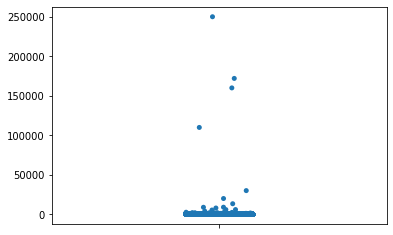

In [19]:
sns.stripplot(x=data[['CIRCONFERENCE (cm)']], orient='v')

* Quelques données semblent avoir des circonférences anormales
  * des circonférences ont l'air bien trop élevées
  * des circonférences sont égales à 0
  

* Si la valeur est proche de 0 nous pouvons considérer qu'elle est juste


* À noter : le conifère Taxodium mucronatum est l'arbre le plus gros du monde avec 50 mètres de circonférence au sol et 34.50m à 1m50 du sol.
  * À minima nous pouvons partir du principe que toute circonference au-delà de cette valeur est anormale
  * [Ce que ça donne en vrai](https://scontent-cdg2-1.xx.fbcdn.net/v/t1.0-9/69862665_1104919109697608_4295910582487351296_o.jpg?_nc_cat=102&_nc_sid=8024bb&_nc_ohc=daP98v15geMAX9ydgz-&_nc_ht=scontent-cdg2-1.xx&oh=7d490189780f044e08d8adab0e38ba48&oe=5F09B800)
  * Le plus grand arbre de France à une circonférence de 370 cm
  * Sans trop de risques, nous pouvons estimer qu'une circonférence au delà de 1500 est anormale

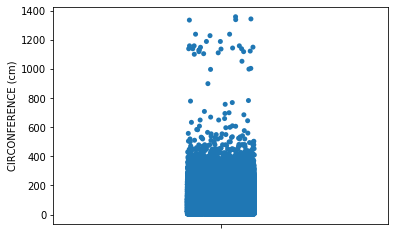

In [20]:
# données sans valeurs anormales
clean_data_circ = data[~(data['CIRCONFERENCE (cm)'] > 1500)]
clean_data_circ = clean_data_circ[~(clean_data_circ['CIRCONFERENCE (cm)'] == 0)]

sns.stripplot(x='CIRCONFERENCE (cm)', data=clean_data_circ, orient='v')

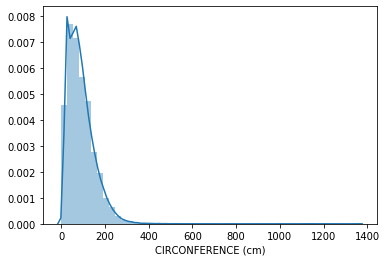

In [21]:
sns.distplot(clean_data_circ['CIRCONFERENCE (cm)'])

* La plupart des circonférences sont entre 0 et 500 cm

>

* **Que faire des données ?** : 
  * une analyse plus poussée doit être faite pour les valeurs égales à 0 : (voir plus bas)
    * combien y'en-a-t-il dans le dataset ?
      * s'il y en a peu, nous pouvons les supprimer
      * sinon, il faudra les modifier intelligemment en croisant avec 
        * la hauteur
        * le stade de developpement
        * le libelle français et l'espece
  * pour les valeurs anormalement grandes
     * supprimer les lignes

#### HAUTEUR (m)

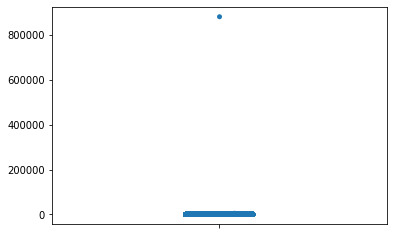

In [22]:
sns.stripplot(x=data[['HAUTEUR (m)']], orient='v')

* Quelques données semblent avoir des hauteurs anormales
  * des hauteurs ont l'air bien trop élevées
  * des hauteurs sont égales à 0 

>

* À noter que l'arbre le plus grand de France mesure 67 mètres
  * À minima nous pouvons partir du principe que toute hauteur au-delà de cette valeur est anormale

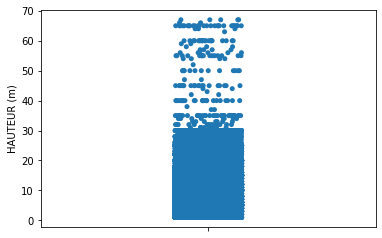

In [23]:
clean_data_haut = data[~(data['HAUTEUR (m)'] > 67)]
clean_data_haut = clean_data_haut[~(clean_data_haut['HAUTEUR (m)'] == 0)]
sns.stripplot(x="HAUTEUR (m)", data=clean_data_haut, orient='v')

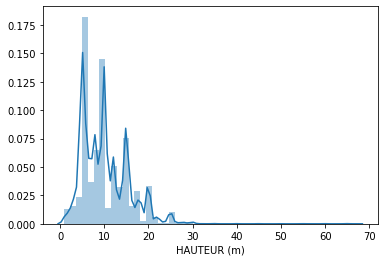

In [24]:
sns.distplot(clean_data_haut['HAUTEUR (m)'])

* La plupart des données se situent entre 0 et 35 mètres

>

* **Que faire des données ?** : 
  * pour les valeurs égales à 0 : même réponse que pour la circonférence (voir plus bas)
  * pour les valeurs anormalement grandes
     * supprimer les lignes

> ### - Supprimer les données anormales

#### CIRCONFERENCE (cm)

In [25]:
# éliminer les valeurs vraiment très aberrantes
data_circ = data[(data['CIRCONFERENCE (cm)'] > 1500)]

nbr_circ_anor_suppr = len(data_circ)

print(">>> AVANT SUPPR - nombre de lignes aberrantes:", nbr_circ_anor_suppr)

data = data.drop(data_circ.index, axis=0)

print(">>> APRES SUPPR - nombre de lignes aberrantes:", len(data[(data['CIRCONFERENCE (cm)'] > 1500)]))

>>> AVANT SUPPR - nombre de lignes aberrantes: 26
>>> APRES SUPPR - nombre de lignes aberrantes: 0


In [26]:
# on filtre les données sans valeurs égales à 0 car elles modifieraient trop la moyenne étant très nombreuses
# on complétera ces données dans un second temps, plutôt que de les supprimer
clean_data_circ = data[~(data['CIRCONFERENCE (cm)'] == 0)]

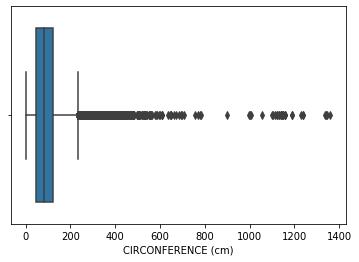

In [27]:
sns.boxplot(x=clean_data_circ['CIRCONFERENCE (cm)'])

* Toutes les valeurs au dessus de 250cm semblent aberrantes

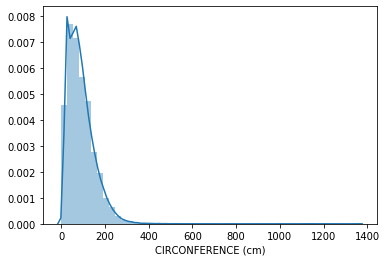

In [28]:
sns.distplot(clean_data_circ['CIRCONFERENCE (cm)'])

* On remarque que les données forment une pseudo distribution normale
* Nous pouvons utiliser la méthode des intervalles interquatile pour filtrer les données aberrantes
* 99,3% des données sont comprises entre \[Q1-\(1.5\*IQR\) ; Q3+\(1.5\*IQR\)\]
* les 0.7% restantes sont considérées comme aberrantes
* en revanche notre courbe est très resserée, nous pouvons augmenter la borne max afin de ne pas exclure des arbres potentiellement larges

In [29]:
# calcul des valeurs utiles
mediane = clean_data_circ['CIRCONFERENCE (cm)'].median()
Q1 = clean_data_circ[clean_data_circ['CIRCONFERENCE (cm)'] < mediane]['CIRCONFERENCE (cm)'].median()
Q3 = clean_data_circ[clean_data_circ['CIRCONFERENCE (cm)'] > mediane]['CIRCONFERENCE (cm)'].median()
IQR = Q3 - Q1
ecart = 4
high_outliers = Q3+(ecart*IQR)
low_outliers = Q1-(ecart*IQR) if Q1-(ecart*IQR) > 0 else 0

print(">>> mediane:" , mediane)
print(">>> Q1:" , Q1)
print("\t>>> n plus petits élements:", len(clean_data_circ[clean_data_circ['CIRCONFERENCE (cm)'] < mediane]['CIRCONFERENCE (cm)']))
print(">>> Q3:", Q3)
print("\t>>> n plus grands élements:", len(clean_data_circ[clean_data_circ['CIRCONFERENCE (cm)'] > mediane]['CIRCONFERENCE (cm)']))
print(">>> IQR:", IQR)
print(">>> Q3+({}*IQR): {}".format(ecart, high_outliers))
print(">>> Q1-({}*IQR): {}".format(ecart, low_outliers))


>>> mediane: 80.0
>>> Q1: 45.0
	>>> n plus petits élements: 89574
>>> Q3: 125.0
	>>> n plus grands élements: 86547
>>> IQR: 80.0
>>> Q3+(4*IQR): 445.0
>>> Q1-(4*IQR): 0


In [30]:
# suppression des high_outliers
data_high_outliers = clean_data_circ[clean_data_circ['CIRCONFERENCE (cm)'] > high_outliers]

nbr_circ_anor_suppr = nbr_circ_anor_suppr + len(data_high_outliers)

print(">>> AVANT SUPPR - nombre de lignes aberrantes:", len(data_high_outliers))

data = data.drop(data_high_outliers.index, axis=0)

print(">>> APRES SUPPR - nombre de lignes aberrantes:", len(data[(data['CIRCONFERENCE (cm)'] > high_outliers)]))

>>> AVANT SUPPR - nombre de lignes aberrantes: 134
>>> APRES SUPPR - nombre de lignes aberrantes: 0


In [31]:
# suppression des low_outliers
data_low_outliers = clean_data_circ[clean_data_circ['CIRCONFERENCE (cm)'] < low_outliers]

nbr_circ_anor_suppr = nbr_circ_anor_suppr + len(data_low_outliers)

print(">>> AVANT SUPPR - nombre de lignes aberrantes:", len(data_low_outliers))

data = data.drop(data_low_outliers.index, axis=0)

print(">>> APRES SUPPR - nombre de lignes aberrantes:", len(data[(data['CIRCONFERENCE (cm)'] < low_outliers)]))

>>> AVANT SUPPR - nombre de lignes aberrantes: 0
>>> APRES SUPPR - nombre de lignes aberrantes: 0


#### HAUTEUR (m)

In [32]:
# éliminer les valeurs vraiment très aberrantes
data_haut = data[(data['HAUTEUR (m)'] > 67)]

nbr_haut_anor_suppr = len(data_haut)

print(">>> AVANT SUPPR - nombre de lignes aberrantes:", nbr_haut_anor_suppr)

data = data.drop(data_haut.index, axis=0)

print(">>> APRES SUPPR - nombre de lignes aberrantes:", len(data[(data['HAUTEUR (m)'] > 67)]))

>>> AVANT SUPPR - nombre de lignes aberrantes: 349
>>> APRES SUPPR - nombre de lignes aberrantes: 0


In [33]:
# on filtre les données sans valeurs égales à 0 car elles modifieraient trop la moyenne étant très nombreuses
# on complétera ces données dans un second temps, plutôt que de les supprimer
clean_data_haut= data[~(data['HAUTEUR (m)'] == 0)]

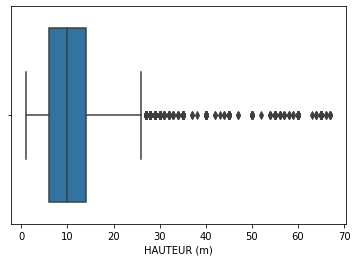

In [34]:
sns.boxplot(x=clean_data_haut['HAUTEUR (m)'])

* Toutes les valeurs au dessus de 27m semblent aberrantes

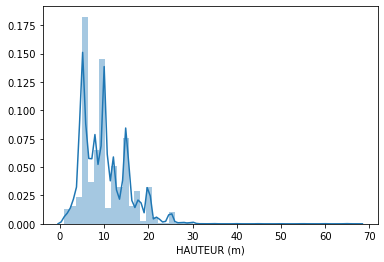

In [35]:
sns.distplot(clean_data_haut['HAUTEUR (m)'])

* Nous pouvons utiliser la méthode des intervalles interquatile pour filtrer les données aberrantes
* 99,3% des données sont comprises entre \[Q1-\(1.5\*IQR\) ; Q3+\(1.5\*IQR\)\]
* les 0.7% restantes sont considérées comme aberrantes

In [36]:
# calcul des valeurs utiles
mediane = clean_data_haut['HAUTEUR (m)'].median()
Q1 = clean_data_haut[clean_data_haut['HAUTEUR (m)'] < mediane]['HAUTEUR (m)'].median()
Q3 = clean_data_haut[clean_data_haut['HAUTEUR (m)'] > mediane]['HAUTEUR (m)'].median()
IQR = Q3 - Q1
ecart = 1.8
high_outliers = Q3+(ecart*IQR)
low_outliers = Q1-(ecart*IQR) if Q1-(ecart*IQR) > 0 else 0

print(">>> mediane:" , mediane)
print(">>> Q1:" , Q1)
print("\t>>> n plus petits élements:", len(clean_data_haut[clean_data_haut['HAUTEUR (m)'] < mediane]['HAUTEUR (m)']))
print(">>> Q3:", Q3)
print("\t>>> n plus grands élements:", len(clean_data_haut[clean_data_haut['HAUTEUR (m)'] > mediane]['HAUTEUR (m)']))
print(">>> IQR:", IQR)
print(">>> Q3+({}*IQR): {}".format(ecart, high_outliers))
print(">>> Q1-({}*IQR): {}".format(ecart, low_outliers))

>>> mediane: 10.0
>>> Q1: 5.0
	>>> n plus petits élements: 82117
>>> Q3: 15.0
	>>> n plus grands élements: 62904
>>> IQR: 10.0
>>> Q3+(1.8*IQR): 33.0
>>> Q1-(1.8*IQR): 0


In [37]:
# suppression des high_outliers
data_high_outliers = clean_data_haut[clean_data_haut['HAUTEUR (m)'] > high_outliers]

nbr_haut_anor_suppr = nbr_haut_anor_suppr + len(data_high_outliers)

print(">>> AVANT SUPPR - nombre de lignes aberrantes:", len(data_high_outliers))

data = data.drop(data_high_outliers.index, axis=0)

print(">>> APRES SUPPR - nombre de lignes aberrantes:", len(data[(data['HAUTEUR (m)'] > high_outliers)]))


>>> AVANT SUPPR - nombre de lignes aberrantes: 193
>>> APRES SUPPR - nombre de lignes aberrantes: 0


>>> AVANT SUPPR - nombre de lignes aberrantes: 0
>>> APRES SUPPR - nombre de lignes aberrantes: 0


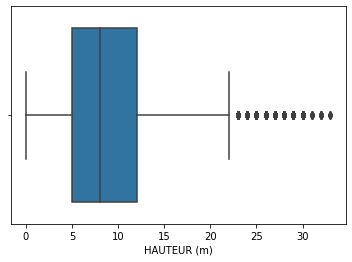

In [38]:
# suppression des low_outliers
data_low_outliers = clean_data_haut[clean_data_haut['HAUTEUR (m)'] < low_outliers]

nbr_haut_anor_suppr = nbr_haut_anor_suppr + len(data_low_outliers)

print(">>> AVANT SUPPR - nombre de lignes aberrantes:", len(data_low_outliers))

data = data.drop(data_low_outliers.index, axis=0)

print(">>> APRES SUPPR - nombre de lignes aberrantes:", len(data[(data['HAUTEUR (m)'] < low_outliers)]))
sns.boxplot(x=data['HAUTEUR (m)'])

## - Compléter les données manquantes (y.c celles égales à 0)
---

> ### - Complétion de la colonne LIBELLE FRANCAIS

In [39]:
print("nombre de libellés français vide", len(data[(data['LIBELLE FRANCAIS'].isna())]))

nombre de libellés français vide 727


>> #### complétion avec le GENRE

In [40]:
# tous les libellés français vides qui ont un genre défini
save = data_save
emptylibfr_genre = save[(save['LIBELLE FRANCAIS'].isna()) & ~(save['GENRE'] == 'Non spécifié') & ~(save['GENRE'].isna())]
print(">>> nombre de libelle français vide ayant un genre non vide:", len(emptylibfr_genre))

>>> nombre de libelle français vide ayant un genre non vide: 601


In [41]:
# nombre de modifications
count_modif = 0
count_non_modif = 0

# pour chaque genre ayant un libelle fr vide
for genre in emptylibfr_genre["GENRE"].unique():
    
    # liste des remplacents (non vides) possibles pour ce genre
    liste_remplacents = save[(save['GENRE'] == genre)]['LIBELLE FRANCAIS'].dropna().unique()
    
    # s'il y a un seul remplacent on modifie le libelle fr de chaque index correspondant à ce genre
    if (len(liste_remplacents) == 1):
        print(">>> (== 1) - genre :", genre, ">>>",  liste_remplacents[0])
        for index in emptylibfr_genre[emptylibfr_genre['GENRE']==genre].index:
            data.loc[index,'LIBELLE FRANCAIS'] = liste_remplacents[0]
            count_modif +=1
            
    # s'il y a plusieurs remplacents, on ne fait rien
    elif (len(liste_remplacents) > 1):
        #print(">>> (> 1) - genre :", genre, ">>>",  liste_remplacents)
        for index in emptylibfr_genre[emptylibfr_genre['GENRE']==genre].index:
            count_non_modif +=1
    
    # si l'espece n'a pas de correspondance ou si elle en a trop car trop générique (n. sp.), on ne fait rien
    else:
        #print(">>> vide:", liste_remplacents)
        for index in emptylibfr_genre[emptylibfr_genre['GENRE']==genre].index:
            count_non_modif +=1
        
print()

nbr_libfr_comp = count_modif

if count_modif+count_non_modif == len(emptylibfr_genre):
    print('>>> OK :)')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\t>>> nombre de libelle français vides ayant un genre non vide:", len(emptylibfr_genre))
else:
    print('>>> KO !!')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\>>> nombre de libelle français vides ayant un genre non vide:", len(emptylibfr_genre))

>>> (== 1) - genre : Quercus >>> Chêne
>>> (== 1) - genre : Juniperus >>> Genévrier
>>> (== 1) - genre : Taxus >>> If
>>> (== 1) - genre : Olea >>> Olivier
>>> (== 1) - genre : Ulmus >>> Orme
>>> (== 1) - genre : Acer >>> Erable
>>> (== 1) - genre : Populus >>> Peuplier
>>> (== 1) - genre : Tilia >>> Tilleul
>>> (== 1) - genre : Eucalyptus >>> Eucalyptus
>>> (== 1) - genre : Picea >>> Epicéa
>>> (== 1) - genre : Pinus >>> Pin
>>> (== 1) - genre : Liriodendron >>> Tulipier
>>> (== 1) - genre : Celtis >>> Micocoulier
>>> (== 1) - genre : Cotoneaster >>> Cotoneaster
>>> (== 1) - genre : Paulownia >>> Paulownia
>>> (== 1) - genre : Chamaecyparis >>> Faux-cyprès
>>> (== 1) - genre : Platanus >>> Platane
>>> (== 1) - genre : Sophora >>> Sophora
>>> (== 1) - genre : Cornus >>> Cornouiller
>>> (== 1) - genre : Toona >>> Cedrele
>>> (== 1) - genre : Ehretia >>> Cabrillet
>>> (== 1) - genre : Trachycarpus >>> Palmier
>>> (== 1) - genre : Aesculus >>> Marronnier
>>> (== 1) - genre : Salix >>> Sau

In [42]:
print("nombre de libellés français vide", len(data[(data['LIBELLE FRANCAIS'].isna())]))

nombre de libellés français vide 354


>> #### complétion avec l'ESPECE

In [43]:
# tous les libellés français vides qui ont une espèce définie
emptylibfr_espece = data[(data['LIBELLE FRANCAIS'].isna()) & ~(data['ESPECE'].isna())]
print(">>> nombre de libelle français vide ayant une espece non vide:", len(emptylibfr_espece))

>>> nombre de libelle français vide ayant une espece non vide: 117


In [44]:
# nombre de modifications
count_modif = 0
count_non_modif = 0

# pour chaque espece ayant un libelle fr vide
for espece in emptylibfr_espece["ESPECE"].unique():
    
    # liste des remplacents possibles pour cette espece
    liste_remplacents = data[(data['ESPECE'] == espece)]['LIBELLE FRANCAIS'].dropna().unique()
    
    # s'il y a un seul remplacent on modifie le libelle fr de chaque index correspondant à cette espece
    if (espece != 'n. sp.') & (len(liste_remplacents) == 1):
        print(">>> (== 1) - espece :", espece, ">>>",  liste_remplacents[0])
        for index in emptylibfr_espece[emptylibfr_espece['ESPECE']==espece].index:
            data.loc[index,'LIBELLE FRANCAIS'] = liste_remplacents[0]
            count_modif +=1
    
    # s'il y a plusieurs remplacents, on ne fait rien
    elif (espece != 'n. sp.') & (len(liste_remplacents) > 1):
        #print(">>> (> 1) - espece :", espece, ">>>",  liste_remplacents)
        for index in emptylibfr_espece[emptylibfr_espece['ESPECE']==espece].index:
            count_non_modif +=1
        
    # si l'espece n'a pas de correspondance ou si elle en a trop car trop générique (n. sp.), on ne fait rien
    else:
        #print(">>> vide ou n. sp.")
        for index in emptylibfr_espece[emptylibfr_espece['ESPECE']==espece].index:
            count_non_modif +=1
            
print()

nbr_libfr_comp = nbr_libfr_comp + count_modif

if count_modif+count_non_modif == len(emptylibfr_espece):
    print('>>> OK :)')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\t>>> nombre de libelle français vides ayant un genre non vide:", len(emptylibfr_espece))
else:
    print('>>> KO !!')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\>>> nombre de libelle français vides ayant un genre non vide:", len(emptylibfr_espece))

>>> (== 1) - espece : pyrifolia >>> Poirier à fruits
>>> (== 1) - espece : cerasifera >>> Prunier à fleurs
>>> (== 1) - espece : x subhirtella >>> Cerisier à fleurs
>>> (== 1) - espece : x hillieri >>> Cerisier à fleurs
>>> (== 1) - espece : floribunda >>> Pommier à fleurs
>>> (== 1) - espece : baccata var. mandshurica >>> Pommier à fleurs
>>> (== 1) - espece : padus >>> Cerisier à grappes
>>> (== 1) - espece : torminalis >>> Alisier
>>> (== 1) - espece : sinense >>> Troene
>>> (== 1) - espece : maxima >>> Noisetier
>>> (== 1) - espece : x robusta >>> Pommier à fleurs

>>> OK :)
	>>> nombre de modifications effectuées: 32
	>>> nombre de données non modifiées : 85
	>>> nombre de libelle français vides ayant un genre non vide: 117


In [45]:
print("nombre de libellés français vide", len(data[(data['LIBELLE FRANCAIS'].isna())]))   

nombre de libellés français vide 322


>> #### suppression des derniers LIBELLE FRANCAIS vides

In [46]:
nbr_libfr_suppr = len(data[(data['LIBELLE FRANCAIS'].isna())])

print("AVANT SUPPR - nombre de LIBELLE FRANCAIS encore vides:", len(data[(data['LIBELLE FRANCAIS'].isna())]))
data = data.drop(data[(data['LIBELLE FRANCAIS'].isna())].index)
print("APRES SUPPR - nombre de LIBELLE FRANCAIS encore vides:", len(data[(data['LIBELLE FRANCAIS'].isna())]))

AVANT SUPPR - nombre de LIBELLE FRANCAIS encore vides: 322
APRES SUPPR - nombre de LIBELLE FRANCAIS encore vides: 0


> ### - Complétion de la colonne ESPECE

In [47]:
print("nombre de ESPECE vide", len(data[(data['ESPECE'].isna())]))

nombre de ESPECE vide 1850


>> #### complétion avec le LIBELLE FRANCAIS

In [48]:
# toutes les ESPECEs vides qui ont un LIBELLE FRANCAIS défini
emptyespece_libfr = data[(data['ESPECE'].isna()) & ~(data['LIBELLE FRANCAIS'].isna())]
print(">>> nombre de ESPECE ayant un LIBELLE FRANCAIS non vide:", len(emptyespece_libfr))

>>> nombre de ESPECE ayant un LIBELLE FRANCAIS non vide: 1850


In [49]:
# nombre de modifications
count_modif = 0
count_non_modif = 0
nbr_espece_comp = 0

# pour chaque LIBELLE FRANCAIS ayant une ESPECE vide
for libfr in emptyespece_libfr["LIBELLE FRANCAIS"].unique():
    
    # liste des remplacents possibles pour ce LIBELLE FRANCAIS
    liste_remplacents = data[(data['LIBELLE FRANCAIS'] == libfr)]['ESPECE'].dropna().unique()
    
    # s'il y a un seul remplacent on modifie le libelle fr de chaque index correspondant à cette espece
    if (len(liste_remplacents) == 1):
        print(">>> (== 1) - libfr :", libfr, ">>>",  liste_remplacents[0])
        for index in emptyespece_libfr[emptyespece_libfr['LIBELLE FRANCAIS']==libfr].index:
            data.loc[index,'ESPECE'] = liste_remplacents[0]
            count_modif +=1
    
    # s'il y a plusieurs remplacents, on ne fait rien
    elif (len(liste_remplacents) > 1):
        #print(">>> (> 1) - libfr :", libfr, ">>>",  liste_remplacents)
        for index in emptyespece_libfr[emptyespece_libfr['LIBELLE FRANCAIS']==libfr].index:
            count_non_modif +=1
        
    # si le LIBELLE FRANCAIS n'a pas de correspondance, on ne fait rien
    else:
        #print(">>> vide ou n. sp.")
        for index in emptyespece_libfr[emptyespece_libfr['LIBELLE FRANCAIS']==libfr].index:
            count_non_modif +=1
            
print()

nbr_espece_comp = nbr_espece_comp + count_modif

if count_modif+count_non_modif == len(emptyespece_libfr):
    print('>>> OK :)')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\t>>> nombre de libelle français vides ayant un genre non vide:", len(emptyespece_libfr))
else:
    print('>>> KO !!')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\>>> nombre de libelle français vides ayant un genre non vide:", len(emptyespece_libfr))

>>> (== 1) - libfr : Tulipier >>> tulipifera
>>> (== 1) - libfr : Chitalpa >>> tashkentensis
>>> (== 1) - libfr : Styrax >>> japonicus
>>> (== 1) - libfr : Cognassier >>> oblonga

>>> OK :)
	>>> nombre de modifications effectuées: 6
	>>> nombre de données non modifiées : 1844
	>>> nombre de libelle français vides ayant un genre non vide: 1850


In [50]:
print("nombre de ESPECE vide", len(data[(data['ESPECE'].isna())]))   

nombre de ESPECE vide 1844


#### analyse des données ESPECE - pourquoi si peu de modifications ?

In [51]:
sub_data = data[['LIBELLE FRANCAIS','ESPECE']]
pivot = pd.pivot_table(sub_data, index=['LIBELLE FRANCAIS'], aggfunc=lambda x: len(x.unique()))

print(">>> nombre de libelle francais ayant une seule espece:", 
      len(pivot[pivot['ESPECE'] == 1]),
      "soit:",
      round(len(pivot[pivot['ESPECE'] == 1])/len(pivot),2)*100,
      "%"
     )

#

print(">>> nombre de libelle francais ayant + de 1 espece:", 
      len(pivot[pivot['ESPECE'] > 1]),
      "soit:",
      round(len(pivot[pivot['ESPECE'] > 1])/len(pivot),2)*100,
      "%"
     )

#

print(">>> nombre de libelle francais ayant + de 5 especes:", 
      len(pivot[pivot['ESPECE'] > 5]),
      "soit:",
      round(len(pivot[pivot['ESPECE'] > 5])/len(pivot),2)*100,
      "%"
     )

#

print(">>> nombre de libelle francais ayant + de 10 especes:", 
      len(pivot[pivot['ESPECE'] > 10]),
      "soit:",
      round(len(pivot[pivot['ESPECE'] > 10])/len(pivot),2)*100,
      "%"
     )

#

print(">>> nombre de libelle francais ayant + de 20 especes:", 
      len(pivot[pivot['ESPECE'] > 20]),
      "soit:",
      round(len(pivot[pivot['ESPECE'] > 20])/len(pivot),2)*100,
      "%"
     )

#

print(">>> nombre de libelle francais ayant + de 50 especes:", 
      len(pivot[pivot['ESPECE'] > 50]),
      "soit:",
      round(len(pivot[pivot['ESPECE'] > 50])/len(pivot),2)*100,
      "%"
     )


>>> nombre de libelle francais ayant une seule espece: 85 soit: 44.0 %
>>> nombre de libelle francais ayant + de 1 espece: 107 soit: 56.00000000000001 %
>>> nombre de libelle francais ayant + de 5 especes: 34 soit: 18.0 %
>>> nombre de libelle francais ayant + de 10 especes: 17 soit: 9.0 %
>>> nombre de libelle francais ayant + de 20 especes: 5 soit: 3.0 %
>>> nombre de libelle francais ayant + de 50 especes: 0 soit: 0.0 %


* Plus de la moitié des LIBELLE FRANCAIS ont plus de 1 espèces associées et 20% en ont plus de 5

In [52]:
# détail quand il y a plus d'une espece
for index in pivot[pivot['ESPECE'] > 20].index:
    print(">>>", index)
    print(data[data['LIBELLE FRANCAIS'] == index]['ESPECE'].value_counts())
    print()
                 

>>> Bouleau
pendula                      1465
utilis                        462
n. sp.                        216
papyrifera                     72
nigra                          65
pubescens                      55
albosinensis                   18
populifolia                    18
pendula var. pendula           11
ermanii                         8
maximowicziana                  5
davurica                        4
alleghaniensis                  3
lenta                           3
x caerulea                      2
medwediewii                     2
platyphylla                     1
nana                            1
luminifera                      1
forrestii                       1
delavayi subsp. potaninii       1
Name: ESPECE, dtype: int64

>>> Cerisier à fleurs
serrulata        2425
x subhirtella     418
avium             320
serrula           178
maackii           126
x schmittii       123
x hillieri         70
sargentii          68
x yedoensis        39
mahaleb            23
x bl

* On remarque que pour une LIBELLE FRANCAIS donné, il y a toujours une ESPECE qui ressort nettement
* Nous pouvons utiliser cette ESPECE comme référence pour un LIBELLE FRANCAIS donné
* On enlève l'espèce générique 'n. sp.'

#### complétion des données ESPECE

In [53]:
# nombre de modifications
count_modif = 0
count_non_modif = 0

# pour chaque LIBELLE FRANCAIS ayant une ESPECE vide
for libfr in emptyespece_libfr["LIBELLE FRANCAIS"].unique():
    
    # liste des remplacents possibles pour ce LIBELLE FRANCAIS
    liste_remplacents = data[(data['LIBELLE FRANCAIS'] == libfr)]['ESPECE'].dropna().unique()
    liste_remplacents_count = data[(data['LIBELLE FRANCAIS'] == libfr)]['ESPECE'].dropna().value_counts()
    
    # s'il y a un seul remplacent on modifie le libelle fr de chaque index correspondant à cette espece
    if (len(liste_remplacents) == 1):
        #print(">>> (== 1) - libfr :", libfr, ">>>",  liste_remplacents[0])
        for index in emptyespece_libfr[emptyespece_libfr['LIBELLE FRANCAIS']==libfr].index:
            data.loc[index,'ESPECE'] = liste_remplacents[0]
            count_modif +=1
    
    # s'il y a plusieurs remplacents, on prend celui ayant le plus d'occurences hors n. sp.
    elif (len(liste_remplacents) > 1):
        print(">>> (> 1) - libfr :", libfr, ">>>",  liste_remplacents_count[liste_remplacents_count.index != 'n. sp.'].idxmax())
        for index in emptyespece_libfr[emptyespece_libfr['LIBELLE FRANCAIS']==libfr].index:
            data.loc[index,'ESPECE'] = liste_remplacents_count[liste_remplacents_count.index != 'n. sp.'].idxmax()
            count_modif +=1
            
    # si le LIBELLE FRANCAIS n'a pas de correspondance, on ne fait rien
    else:
        #print(">>> vide ou n. sp.")
        for index in emptyespece_libfr[emptyespece_libfr['LIBELLE FRANCAIS']==libfr].index:
            count_non_modif +=1

print()

nbr_espece_comp = nbr_espece_comp + count_modif

if count_modif+count_non_modif == len(emptyespece_libfr):
    print('>>> OK :)')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\t>>> nombre de libelle français vides ayant un genre non vide:", len(emptyespece_libfr))
else:
    print('>>> KO !!')
    print("\t>>> nombre de modifications effectuées:" , count_modif)
    print("\t>>> nombre de données non modifiées :" , count_non_modif)
    print("\>>> nombre de libelle français vides ayant un genre non vide:", len(emptyespece_libfr))

>>> (> 1) - libfr : Orme >>> minor
>>> (> 1) - libfr : Cerisier à fleurs >>> serrulata
>>> (> 1) - libfr : Chêne >>> robur
>>> (> 1) - libfr : Pommier à fleurs >>> tschonoskii
>>> (> 1) - libfr : Amélanchier >>> lamarckii
>>> (> 1) - libfr : Erable >>> pseudoplatanus
>>> (> 1) - libfr : Peuplier >>> nigra
>>> (> 1) - libfr : Tilleul >>> tomentosa
>>> (> 1) - libfr : Eucalyptus >>> gunnii
>>> (> 1) - libfr : Micocoulier >>> australis
>>> (> 1) - libfr : Paulownia >>> tomentosa
>>> (> 1) - libfr : Platane >>> x hispanica
>>> (> 1) - libfr : Sophora >>> japonica
>>> (> 1) - libfr : Cornouiller >>> mas
>>> (> 1) - libfr : Cedrele >>> sinensis
>>> (> 1) - libfr : If >>> baccata
>>> (> 1) - libfr : Pin >>> nigra
>>> (> 1) - libfr : Palmier >>> fortunei
>>> (> 1) - libfr : Marronnier >>> hippocastanum
>>> (> 1) - libfr : Pommier à fruits >>> domestica
>>> (> 1) - libfr : Pterocarya >>> fraxinifolia
>>> (> 1) - libfr : Mûrier >>> alba
>>> (> 1) - libfr : Charme >>> betulus
>>> (> 1) - libfr : 

In [54]:
print("nombre de ESPECE vide", len(data[(data['ESPECE'].isna())]))   

nombre de ESPECE vide 1


>> #### suppression des dernières ESPECEs vides

In [55]:
nbr_espece_suppr = len(data[(data['ESPECE'].isna())])

print("AVANT SUPPR - nombre de ESPECEs encore vides:", len(data[(data['ESPECE'].isna())]))
data = data.drop(data[(data['ESPECE'].isna())].index)
print("APRES SUPPR - nombre de ESPECEs encore vides:", len(data[(data['ESPECE'].isna())]))

AVANT SUPPR - nombre de ESPECEs encore vides: 1
APRES SUPPR - nombre de ESPECEs encore vides: 0


> ### - Remplacer les valeurs égales à 0 pour CIRCONFERENCE (cm) et HAUTEUR (m)

* Un certain nombre d'arbres ont une circonférence et une hauteur égale à 0 (ainsi qu'un stade de développement non renseigné)


* Deux possibilités envisagées :
  * Il s'agit d'un manque de renseignement dans le fichier
  * Les arbres sont encore à l'état de graine et n'ont donc pas de mesure
  
  
* Dans le cadre de ce projet la première possibilité est privilégiée, nous modifierons donc les données
* En effet, il existe dans le fichier des arbres dont la circonférence et la hauteur sont très faibles

#### Analyse des circonférences et hauteurs égales à 0

In [56]:
# nombre de circonférences égales à 0
nbr_zero = (data['CIRCONFERENCE (cm)'] == 0).value_counts()
print('>>> nombre de circonférences égales à 0')
print(nbr_zero)

print()

print('>>> soit :',  round(nbr_zero[True]/len(data)*100,2), "%")

>>> nombre de circonférences égales à 0
False    181295
True      22982
Name: CIRCONFERENCE (cm), dtype: int64

>>> soit : 11.25 %


In [57]:
# nombre de hauteurs égales à 0
nbr_zero = (data['HAUTEUR (m)'] == 0).value_counts()
print('>>> nombre de hauteurs égales à 0')
print(nbr_zero)

print()

print('>>> soit :',  round(nbr_zero[True]/len(data)*100,2), "%")

>>> nombre de hauteurs égales à 0
False    172509
True      31768
Name: HAUTEUR (m), dtype: int64

>>> soit : 15.55 %


* Nous ne pouvons pas simplement supprimer les données car il y a trop de données dans le dataset égales à 0

In [58]:
# nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0
nbr_double_zero = len(data[(data['CIRCONFERENCE (cm)'] == 0) & (data['HAUTEUR (m)'] == 0)])
print('>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0:',nbr_double_zero)

print(">>> soit:", 
        round(
            nbr_double_zero
            /
            len(data[(data['CIRCONFERENCE (cm)'] == 0)])*100
        ,2), "% des lignes ayant CIRCONFERENCE = 0")

print(">>> soit:", 
        round(
            nbr_double_zero
            /
            len(data[(data['HAUTEUR (m)'] == 0)])*100
        ,2), "% des lignes ayant HAUTEUR = 0")

>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0: 22709
>>> soit: 98.81 % des lignes ayant CIRCONFERENCE = 0
>>> soit: 71.48 % des lignes ayant HAUTEUR = 0


* Pour la CIRCONFERENCE nous ne pouvons pas utiliser la HAUTEUR dans 99% des cas
* En revanche, pour la HAUTEUR nous pourrions utiliser la CIRCONFERENCE dans 28% des cas
* Nous pouvons utiliser d'autres données pour établir une corrélation entre HAUTEUR & CIRCONFERENCE, telles que:
  * STADE DE DEVELOPPEMENT
  * LIBELLE FRANCAIS / ESPECE 

In [59]:
# nombre de STADE DE DEVELOPPEMENT vides quand CIRCONFERENCE = 0 et HAUTEUR = 0
temp = data[
            (data['CIRCONFERENCE (cm)'] == 0) &
            (data['HAUTEUR (m)'] == 0) &
            (data['STADE DE DEVELOPPEMENT'].isna())
           ]

print('>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0 et STADE DE DEVELOPPEMENT vide:', len(temp))

print(">>> soit:", 
        round(
            len(temp)
            /
            len(data[(data['CIRCONFERENCE (cm)'] == 0) & (data['HAUTEUR (m)'] == 0)])*100
        ,2), "%")

>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0 et STADE DE DEVELOPPEMENT vide: 22406
>>> soit: 98.67 %


* Le stade de développement ne peut pas être utilisé pour déduire la circonférence ou la hauteur
  * cette donnée n'est pas renseigné quand CIRCONFERENCE = 0 et HAUTEUR = 0 (ce qui semble logique)
* Reste le LIBELLE FRANCAIS et l'ESPECE

In [60]:
# nombre de LIBELLE FRANCAIS vides quand CIRCONFERENCE = 0 et HAUTEUR = 0
temp = data[
            (data['CIRCONFERENCE (cm)'] == 0) &
            (data['HAUTEUR (m)'] == 0) &
            (data['LIBELLE FRANCAIS'].isna())
           ]

print('>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0 et LIBELLE FRANCAIS vide:', len(temp))

print(">>> soit:", 
        round(
            len(temp)
            /
            len(data[(data['CIRCONFERENCE (cm)'] == 0) & (data['HAUTEUR (m)'] == 0)])*100
        ,2), "%")

>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0 et LIBELLE FRANCAIS vide: 0
>>> soit: 0.0 %


In [61]:
# nombre de ESPECE vides quand CIRCONFERENCE = 0 et HAUTEUR = 0
temp = data[
            (data['CIRCONFERENCE (cm)'] == 0) &
            (data['HAUTEUR (m)'] == 0) &
            (data['ESPECE'].isna())
           ]

print('>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0 et ESPECE vide:', len(temp))

print(">>> soit:", 
        round(
            len(temp)
            /
            len(data[(data['CIRCONFERENCE (cm)'] == 0) & (data['HAUTEUR (m)'] == 0)])*100
        ,2), "%")

>>> nombre de lignes ayant CIRCONFERENCE = 0 et HAUTEUR = 0 et ESPECE vide: 0
>>> soit: 0.0 %


* le LIBELLE FRANCAIS en conjonction avec l'ESPECE peuvent être utilisés

#### Remplacement grâce aux LIBELLE FRANCAIS et ESPECE

In [62]:
# liste des hauteurs et circonférences non nulles et des libelles francais
sub_data = data[
    ~(data['CIRCONFERENCE (cm)'] == 0) &
    ~(data['HAUTEUR (m)'] == 0) &
    ~(data['ESPECE'].isna()) &
    ~(data['LIBELLE FRANCAIS'].isna())
][['LIBELLE FRANCAIS', 'ESPECE', 'CIRCONFERENCE (cm)', 'HAUTEUR (m)']]

print(len(sub_data))
sub_data.head(5)

172236


,LIBELLE FRANCAIS,ESPECE,CIRCONFERENCE (cm),HAUTEUR (m)
0,Marronnier,x carnea,45.0,6.0
1,Frêne,excelsior,115.0,10.0
2,Chêne,rubra,60.0,10.0
4,Platane,x hispanica,180.0,18.0
5,Noisetier de Byzance,colurna,140.0,10.0


In [63]:
# la moyenne des hauteurs et circonférences par couple de LIBELLE FRANCAIS / ESPECE
pivot = pd.pivot_table(sub_data, index=['LIBELLE FRANCAIS', 'ESPECE'], aggfunc='mean')

pivot

CIRCONFERENCE (cm)  HAUTEUR (m)
LIBELLE FRANCAIS ESPECE                                        
Abelia           n. sp.                  20.000000     5.000000
                 triflora                75.000000     6.000000
Abricotier       armeniaca               15.708333     2.520833
Abricotier fruit armeniaca               10.000000     2.000000
Ailante          altissima              104.198238    10.803231
...                                            ...          ...
Viorne           odoratissimum           10.000000     1.000000
                 tinus                   30.000000     5.000000
Virgilier        kentukea                57.480000     5.320000
                 n. sp.                  95.000000     5.000000
                 sinensis                55.250000     5.625000

[595 rows x 2 columns]

In [64]:
# nombre de modifications 
count_modif = 0

# pour chaque couple libelle francais et espece
for lib_fr, espece in pivot.index:
    
    # on récupère tous les couples ayant CIRCONFERENCE = 0 et HAUTEUR = 0
    temp = data[
            (data['LIBELLE FRANCAIS'] == lib_fr) & 
            (data['ESPECE'] == espece) & 
            (data['CIRCONFERENCE (cm)'] == 0) &
            (data['HAUTEUR (m)'] == 0)
           ]

    # on modifie chaque index de ce couple par la moyenne des CIRCONFERENCE et HAUTEUR correspondante à ce couple
    if len(temp) !=0:
        data.loc[temp.index, 'CIRCONFERENCE (cm)'] = pivot.loc[lib_fr, espece]['CIRCONFERENCE (cm)']
        data.loc[temp.index, 'HAUTEUR (m)'] = pivot.loc[lib_fr,espece]['HAUTEUR (m)']
        count_modif = count_modif + len(temp)
        
nbr_circ_zero_comp = count_modif
nbr_haut_zero_comp = count_modif
print(">>> nombre de modifications :", count_modif)

>>> nombre de modifications : 22430


In [65]:
# nombre de circonférences égales à 0
nbr_zero = (data['CIRCONFERENCE (cm)'] == 0).value_counts()
print('>>> nombre de circonférences égales à 0')
print(nbr_zero)

print()

print('>>> soit :',  round(nbr_zero[True]/len(data)*100,2), "%")

>>> nombre de circonférences égales à 0
False    203725
True        552
Name: CIRCONFERENCE (cm), dtype: int64

>>> soit : 0.27 %


In [66]:
# suppression des circonférences égales à 0 restantes
nbr_circ_zero_suppr = len(data[data['CIRCONFERENCE (cm)'] == 0])

data = data.drop(data[data['CIRCONFERENCE (cm)'] == 0].index)

print(">>> nombre de données:", len(data))

>>> nombre de données: 203725


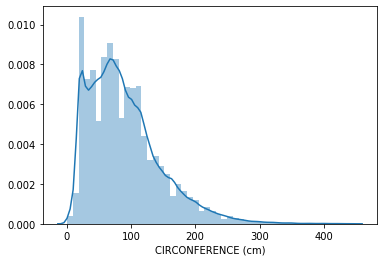

In [67]:
sns.distplot(data['CIRCONFERENCE (cm)'])

In [68]:
# nombre de hauteurs égales à 0
nbr_zero = (data['HAUTEUR (m)'] == 0).value_counts()
print('>>> nombre de hauteurs égales à 0')
print(nbr_zero)

print()

nbr_haut_zero_comp = nbr_haut_zero_comp + len(data[data['HAUTEUR (m)']==0])

print('>>> soit :',  round(nbr_zero[True]/len(data)*100,2), "%")

>>> nombre de hauteurs égales à 0
False    194666
True       9059
Name: HAUTEUR (m), dtype: int64

>>> soit : 4.45 %


* Il reste ~9k HAUTEURS à modifier, ce sont celles dont la CIRCONFERENCE n'étaient pas égales à 0

#### Remplacement de manière itérative (pour les HAUTEURs égales à 0 restantes)

In [69]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# suppression des deux lignes ajoutées de manière forfuite par la complétion utilisant les données save
data = data.drop(data[data['LIBELLE FRANCAIS'].isna()].index)
data = data.drop(data[data['CIRCONFERENCE (cm)'].isna()].index)
data = data.drop(data[data['HAUTEUR (m)'].isna()].index)

# on crée des ID équivalent aux colonnes LIBELLE FRANCAIS et ESPECE
# data['LIBELLE FRANCAIS NBR'] = data['LIBELLE FRANCAIS'].astype("category").cat.codes
# data['ESPECE NBR'] = data['ESPECE'].astype("category").cat.codes

# on récupère toutes les données HAUTEUR (y.c celle égale à 0) 
# ayant une CIRCONFERENCE != 0, un LIBELLE FRANCAIS et une ESPECE
temp = data[data['CIRCONFERENCE (cm)'] != 0
][['CIRCONFERENCE (cm)','HAUTEUR (m)']]

print(">>> nombre de données - data :", len(data))
print(">>> nombre de données - temp :", len(temp))

imputer = IterativeImputer(missing_values=0, random_state=0)
imputed_data = imputer.fit_transform(temp.values)

temp2 = pd.DataFrame(imputed_data, index=temp.index, columns=temp.columns)
data['HAUTEUR (m)'] = temp2['HAUTEUR (m)']


>>> nombre de données - data : 203724
>>> nombre de données - temp : 203724


In [70]:
# nombre de hauteurs égales à 0
nbr_zero = (data['HAUTEUR (m)'] == 0).value_counts()
print('>>> nombre de hauteurs égales à 0')
print(nbr_zero)

>>> nombre de hauteurs égales à 0
False    203724
Name: HAUTEUR (m), dtype: int64


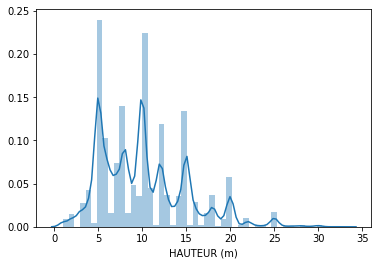

In [71]:
sns.distplot(data['HAUTEUR (m)'])

> ### - Complétion de la colonne STADE DE DEVELOPPEMENT

In [72]:
from sklearn.linear_model import SGDClassifier

# données de référence
temp = data[['CIRCONFERENCE (cm)','HAUTEUR (m)', 'STADE DE DEVELOPPEMENT']].dropna()

# taille du jeu de données
test_size = 10_000
train_size = len(temp) - 10_000

# test_size dernières lignes
X_train = temp[['CIRCONFERENCE (cm)','HAUTEUR (m)']][-train_size:] 
y_train = temp['STADE DE DEVELOPPEMENT'][-train_size:]

# entrainement du modèle
clf = SGDClassifier(loss="hinge", penalty="l1", max_iter=10000)
clf.fit(X_train, y_train)

print(">>> nombre de données non vides:", len(temp))
print(">>> taille du jeu de données pour entrainement du modèle:", train_size)


>>> nombre de données non vides: 147203
>>> taille du jeu de données pour entrainement du modèle: 137203


In [73]:
# d'autres cas qui n'ont pas servis à entraîner le modèle
X_test = temp[['CIRCONFERENCE (cm)','HAUTEUR (m)']].head(test_size)
y_test = temp['STADE DE DEVELOPPEMENT'].head(test_size)

# vérification de la précision du modèle [0;1]
print("précision du modèle: ", clf.score(X_test,y_test))

précision du modèle:  0.6642


In [74]:
# utilisation du modèle pour définir les STADE DE DEVELOPPEMENT vides
temp = data[data['STADE DE DEVELOPPEMENT'].isna()][['CIRCONFERENCE (cm)','HAUTEUR (m)', 'STADE DE DEVELOPPEMENT']]

nbr_stddev_comp = len(temp)

X = temp[['CIRCONFERENCE (cm)','HAUTEUR (m)']]

tab = clf.predict(X.values)

temp2 = pd.DataFrame(tab, index=temp.index, columns=['STADE DE DEVELOPPEMENT'])

serie1 = data[~data['STADE DE DEVELOPPEMENT'].isna()]['STADE DE DEVELOPPEMENT']
serie2 = temp2['STADE DE DEVELOPPEMENT']

concat = pd.concat([serie1,serie2])
concat = concat.sort_index()

data['STADE DE DEVELOPPEMENT'] = concat


## - Résumé des données supprimées / complétés / mergées
---

> ### Données supprimées

#### Colonnes supprimées

* **10 colonnes:**
  * IDBASE
  * TYPE EMPLACEMENT
  * DOMANIALITE
  * COMPLEMENT ADRESSE
  * NUMERO
  * LIEU / ADRESSE
  * IDEMPLACEMENT
  * GENRE
  * VARIETE OUCULTIVAR
  * REMARQUABLE

#### Lignes supprimées

In [75]:
print(">>> LIBELLE FRANCAIS vides:", nbr_libfr_suppr)
print(">>> ESPECE vides:", nbr_espece_suppr)
print(">>> CIRCONFERENCE (cm) anormales:", nbr_circ_anor_suppr)
print(">>> CIRCONFERENCE (cm) égales à 0:", nbr_circ_zero_suppr)
print(">>> HAUTEUR (m) anormales:", nbr_haut_anor_suppr)
print()
print(">>> total:", nbr_libfr_suppr+nbr_espece_suppr+nbr_circ_anor_suppr+nbr_circ_zero_suppr+nbr_haut_anor_suppr)

>>> LIBELLE FRANCAIS vides: 322
>>> ESPECE vides: 1
>>> CIRCONFERENCE (cm) anormales: 160
>>> CIRCONFERENCE (cm) égales à 0: 552
>>> HAUTEUR (m) anormales: 542

>>> total: 1577


> ### Données complétées

In [76]:
print(">>> LIBELLE FRANCAIS complétés:", nbr_libfr_comp)
print(">>> ESPECE complétés:", nbr_espece_comp)
print(">>> CIRCONFERENCE (cm) égales à 0:", nbr_circ_zero_comp)
print(">>> HAUTEUR (m) égales à 0:", nbr_haut_zero_comp)
print(">>> STADE DE DEVELOPPEMENT complétés:", nbr_stddev_comp)
print()
print(">>> total:", nbr_libfr_comp+nbr_espece_comp+nbr_circ_zero_comp+nbr_haut_zero_comp+nbr_stddev_comp)

>>> LIBELLE FRANCAIS complétés: 406
>>> ESPECE complétés: 1855
>>> CIRCONFERENCE (cm) égales à 0: 22430
>>> HAUTEUR (m) égales à 0: 31489
>>> STADE DE DEVELOPPEMENT complétés: 56521

>>> total: 112701


> ### Données mergées

* **PARIS CENTRE:**
  * PARIS 1ER ARRDT
  * PARIS 2E ARRDT
  * PARIS 3E ARRDT
  * PARIS 4E ARRDT
  * PARIS 5E ARRDT
  * PARIS 6E ARRDT
  * PARIS 7E ARRDT
  * PARIS 8E ARRDT
  * PARIS 9E ARRDT
  * PARIS 10E ARRDT
  * PARIS 11E ARRDT


* **PARIS NORD**
  * PARIS 17E ARRDT
  * PARIS 18E ARRDT
  * PARIS 19E ARRDT
  * PARIS 20E ARRDT
  * SEINE-SAINT-DENIS 
  

* **PARIS EST**
  * VAL-DE-MARNE
  * BOIS DE VINCENNES
  * PARIS 12E ARRDT
   
   
* **PARIS OUEST**
  * HAUTS-DE-SEINE
  * BOIS DE BOULOGNE
  * PARIS 16E ARRDT
  
  
* **PARIS SUD**
  * PARIS 13E ARRDT
  * PARIS 14E ARRDT
  * PARIS 15E ARRDT

> ### Au global, avant / après

In [77]:
print(">>> AVANT")
print("\t>>> nombres de lignes:", len(data_save))
print("\t>>> nombres de colonnes:", len(data_save.columns))

print()

lignes_suppr = len(data_save)-len(data)
lignes_suppr_pourc = round(lignes_suppr/len(data_save),2)*100

colonnes_suppr = len(data_save.columns)-len(data.columns)
colonnes_suppr_pourc = round(colonnes_suppr/len(data_save.columns),2)*100

print(">>> APRES")
print("\t>>> nombres de lignes:", len(data), "( -", lignes_suppr , ")", "( soit:", lignes_suppr_pourc, "%)")
print("\t>>> nombres de colonnes:", len(data.columns), "( -", colonnes_suppr , ")", "( soit:", colonnes_suppr_pourc, "%)")

>>> AVANT
	>>> nombres de lignes: 205301
	>>> nombres de colonnes: 17

>>> APRES
	>>> nombres de lignes: 203724 ( - 1577 ) ( soit: 1.0 %)
	>>> nombres de colonnes: 8 ( - 9 ) ( soit: 53.0 %)


# - Analyser & exploiter
---
---

## Distribution des variables continues
---

* CIRCONFERENCE (cm)
* HAUTEUR (m)

> ### CIRCONFERENCE (cm)

#### moyenne, médiane, écart type, quartiles

In [78]:
# calcul des quantiles
# quantile = les quantiles sont les valeurs qui divisent un jeu de données en intervalles contenant le même nombre de données

# moyenne = somme des valeurs / nombre de valeurs
print(">>> moyenne:", data['CIRCONFERENCE (cm)'].mean())

# mediane = la valeur qui sépare les données en deux
print(">>> médiane:", data['CIRCONFERENCE (cm)'].median())

# l’écart type est une mesure de la dispersion des valeurs d'un échantillon
# variance = moyenne des écarts par rapport à la moyenne (exprimée en unité mesurée au carré)
# écart type = racine carré de la variance (pour revenir à un même ordre d'unité)
print(">>> écart-type:", data['CIRCONFERENCE (cm)'].std())

# quartile = les quartiles sont les trois quantiles qui divisent un ensemble de données en quatre groupes de taille égale
## 25% des données sont inférieures à Q1 & 75% lui sont supérieures
## 50% des données sont inférieures à la médiane & 50% lui sont supérieures
## 75% des données sont inférieures à Q3 & 25% lui sont supérieures
mediane = data['CIRCONFERENCE (cm)'].median()
Q1 = data[data['CIRCONFERENCE (cm)'] < mediane]['CIRCONFERENCE (cm)'].median()
Q3 = data[data['CIRCONFERENCE (cm)'] > mediane]['CIRCONFERENCE (cm)'].median()

print(">>> ( {}% des données sont < ) à Q1 = {} et ( {}% lui sont > ) et ( {}% sont = )".format(
    math.trunc(round(len(data[data['CIRCONFERENCE (cm)'] < Q1])/len(data),2)*100),
    Q1,
    math.trunc(round(len(data[data['CIRCONFERENCE (cm)'] > Q1])/len(data),2)*100),
    math.trunc(round(len(data[data['CIRCONFERENCE (cm)'] == Q1])/len(data),2)*100)
))

print(">>> ( {}% des données sont < ) à la médiane = {} et ( {}% lui sont > ) et ( {}% sont = )".format(
    math.trunc(round(len(data[data['CIRCONFERENCE (cm)'] < mediane])/len(data),2)*100),
    mediane,
    math.trunc(round(len(data[data['CIRCONFERENCE (cm)'] > mediane])/len(data),2)*100),
    math.trunc(round(len(data[data['CIRCONFERENCE (cm)'] == mediane])/len(data),2)*100)
))

print(">>> ( {}% des données sont < ) à Q3 = {} et ( {}% lui sont > ) et ( {}% sont = )".format(
    math.trunc(round(len(data[data['CIRCONFERENCE (cm)'] < Q3])/len(data),2)*100),
    Q3,
    math.trunc(round(len(data[data['CIRCONFERENCE (cm)'] > Q3])/len(data),2)*100),
    math.trunc(round(len(data[data['CIRCONFERENCE (cm)'] == Q3])/len(data),2)*100)
))


>>> moyenne: 89.79236286318238
>>> médiane: 80.0
>>> écart-type: 56.05068867042646
>>> ( 24% des données sont < ) à Q1 = 46.0 et ( 76% lui sont > ) et ( 0% sont = )
>>> ( 49% des données sont < ) à la médiane = 80.0 et ( 48% lui sont > ) et ( 3% sont = )
>>> ( 75% des données sont < ) à Q3 = 120.0 et ( 23% lui sont > ) et ( 2% sont = )


#### distributions

Text(0.5, 1.0, 'distribution des circonférences')

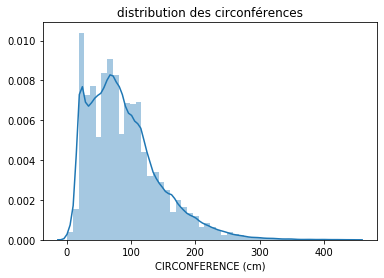

In [79]:
sns.distplot(data['CIRCONFERENCE (cm)']).set_title('distribution des circonférences')

Text(0.5, 1.0, 'profil des circonférences')

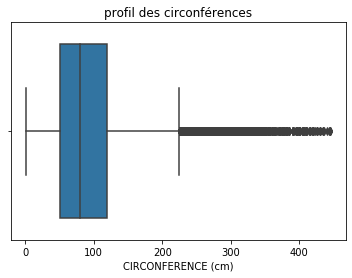

In [80]:
sns.boxplot(x=data['CIRCONFERENCE (cm)']).set_title('profil des circonférences')

> ### HAUTEUR (m)

#### moyenne, médiane, écart type, quartiles

In [81]:
# calcul des quantiles
# quantile = les quantiles sont les valeurs qui divisent un jeu de données en intervalles contenant le même nombre de données

# moyenne = somme des valeurs / nombre de valeurs
print(">>> moyenne:", data['HAUTEUR (m)'].mean())

# mediane = la valeur qui sépare les données en deux
print(">>> médiane:", data['HAUTEUR (m)'].median())

# l’écart type est une mesure de la dispersion des valeurs d'un échantillon
# variance = moyenne des écarts par rapport à la moyenne (exprimée en unité mesurée au carré)
# écart type = racine carré de la variance (pour revenir à un même ordre d'unité)
print(">>> écart-type:", data['HAUTEUR (m)'].std())

# quartile = les quartiles sont les trois quantiles qui divisent un ensemble de données en quatre groupes de taille égale
## 25% des données sont inférieures à Q1 & 75% lui sont supérieures
## 50% des données sont inférieures à la médiane & 50% lui sont supérieures
## 75% des données sont inférieures à Q3 & 25% lui sont supérieures
mediane = data['HAUTEUR (m)'].median()
Q1 = data[data['HAUTEUR (m)'] < mediane]['HAUTEUR (m)'].median()
Q3 = data[data['HAUTEUR (m)'] > mediane]['HAUTEUR (m)'].median()

print(">>> ( {}% des données sont < ) à Q1 = {} et ( {}% lui sont > ) et ( {}% sont = )".format(
    math.trunc(round(len(data[data['HAUTEUR (m)'] < Q1])/len(data),2)*100),
    Q1,
    math.trunc(round(len(data[data['HAUTEUR (m)'] > Q1])/len(data),2)*100),
    math.trunc(round(len(data[data['HAUTEUR (m)'] == Q1])/len(data),2)*100)
))

print(">>> ( {}% des données sont < ) à la médiane = {} et ( {}% lui sont > ) et ( {}% sont = )".format(
    math.trunc(round(len(data[data['HAUTEUR (m)'] < mediane])/len(data),2)*100),
    mediane,
    math.trunc(round(len(data[data['HAUTEUR (m)'] > mediane])/len(data),2)*100),
    math.trunc(round(len(data[data['HAUTEUR (m)'] == mediane])/len(data),2)*100)
))

print(">>> ( {}% des données sont < ) à Q3 = {} et ( {}% lui sont > ) et ( {}% sont = )".format(
    math.trunc(round(len(data[data['HAUTEUR (m)'] < Q3])/len(data),2)*100),
    Q3,
    math.trunc(round(len(data[data['HAUTEUR (m)'] > Q3])/len(data),2)*100),
    math.trunc(round(len(data[data['HAUTEUR (m)'] == Q3])/len(data),2)*100)
))


>>> moyenne: 10.091781994169125
>>> médiane: 10.0
>>> écart-type: 4.937253152555208
>>> ( 22% des données sont < ) à Q1 = 6.0 et ( 72% lui sont > ) et ( 6% sont = )
>>> ( 49% des données sont < ) à la médiane = 10.0 et ( 37% lui sont > ) et ( 14% sont = )
>>> ( 79% des données sont < ) à Q3 = 15.0 et ( 12% lui sont > ) et ( 8% sont = )


#### distributions

Text(0.5, 1.0, 'distribution des hauteurs')

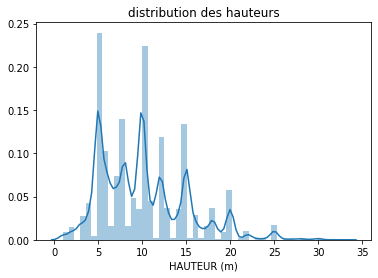

In [82]:
sns.distplot(data['HAUTEUR (m)']).set_title('distribution des hauteurs')

Text(0.5, 1.0, 'profil des hauteurs')

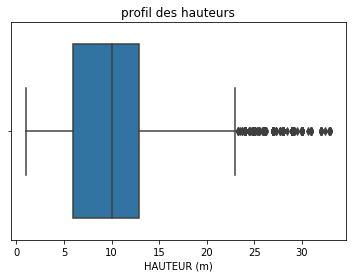

In [83]:
sns.boxplot(x='HAUTEUR (m)', data=data).set_title('profil des hauteurs')

* les données sont en dents de scie, certaines hauteurs sont plus représentées que d'autres
* des catégories de hauteurs peuvent se dégager

In [84]:
serie = data['HAUTEUR (m)'].value_counts().head(10)
for index in serie.index:
    print(">>> les hauteurs de", 
          index, 
          "m correspondent à",
          math.trunc(round(serie[index]/len(data),2)*100), 
          "% des arbres (",
          serie[index],
          ")"
         )

>>> les hauteurs de 5.0 m correspondent à 15 % des arbres ( 29756 )
>>> les hauteurs de 10.0 m correspondent à 14 % des arbres ( 27870 )
>>> les hauteurs de 15.0 m correspondent à 8 % des arbres ( 17183 )
>>> les hauteurs de 8.0 m correspondent à 7 % des arbres ( 14849 )
>>> les hauteurs de 6.0 m correspondent à 6 % des arbres ( 11854 )
>>> les hauteurs de 12.0 m correspondent à 6 % des arbres ( 11665 )
>>> les hauteurs de 7.0 m correspondent à 4 % des arbres ( 8346 )
>>> les hauteurs de 20.0 m correspondent à 4 % des arbres ( 7493 )
>>> les hauteurs de 4.0 m correspondent à 3 % des arbres ( 5444 )
>>> les hauteurs de 9.0 m correspondent à 3 % des arbres ( 5180 )


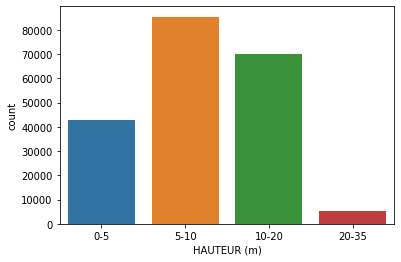

In [85]:
#categories = np.sort(np.append(data['HAUTEUR (m)'].value_counts().head(10).index.to_numpy(),[0,35]))

categories = [0,5,10,20,35]
labels = ['0-5','5-10','10-20','20-35']
haut_cut = pd.cut(data['HAUTEUR (m)'],categories,labels=labels)

sns.countplot(x=haut_cut)

## Distribution des variables catégorielles
---

* ARRONDISSEMENT
* LIBELLE FRANCAIS
* ESPECE
* STADE DE DEVELOPPEMENT

> ### ARRONDISSEMENT

In [86]:
data['ARRONDISSEMENT MERGE'].value_counts()

PARIS NORD      62917
PARIS SUD       45983
PARIS CENTRE    36690
PARIS EST       31579
PARIS OUEST     26555
Name: ARRONDISSEMENT MERGE, dtype: int64

Text(0.5, 1.0, "nombre d'arbres par arrondissement")

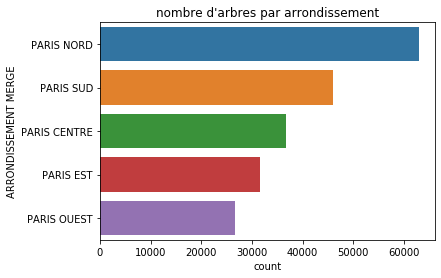

In [87]:
sns.countplot(y='ARRONDISSEMENT MERGE', data=data, order = data['ARRONDISSEMENT MERGE'].value_counts().index).set_title('nombre d\'arbres par arrondissement')

In [88]:
data['ARRONDISSEMENT'].value_counts()

PARIS 15E ARRDT      17290
PARIS 16E ARRDT      16983
PARIS 13E ARRDT      16728
PARIS 20E ARRDT      15511
PARIS 19E ARRDT      14385
PARIS 12E ARRDT      12485
PARIS 14E ARRDT      11965
SEINE-SAINT-DENIS    11614
BOIS DE VINCENNES    11553
PARIS 17E ARRDT      10998
PARIS 18E ARRDT      10409
PARIS 7E ARRDT        8697
VAL-DE-MARNE          7541
PARIS 8E ARRDT        7184
PARIS 11E ARRDT       5889
HAUTS-DE-SEINE        5496
BOIS DE BOULOGNE      4076
PARIS 10E ARRDT       3424
PARIS 4E ARRDT        2758
PARIS 5E ARRDT        2437
PARIS 6E ARRDT        1760
PARIS 1ER ARRDT       1582
PARIS 3E ARRDT        1243
PARIS 9E ARRDT        1182
PARIS 2E ARRDT         534
Name: ARRONDISSEMENT, dtype: int64

Text(0.5, 1.0, "nombre d'arbres par arrondissement")

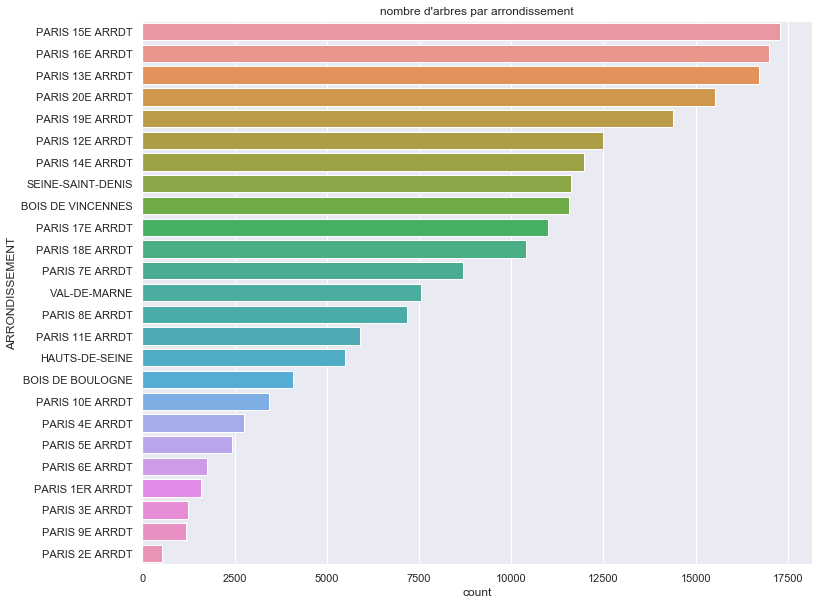

In [89]:
sns.set(rc={'figure.figsize':(12,10)})
sns.countplot(y='ARRONDISSEMENT', data=data, order = data['ARRONDISSEMENT'].value_counts().index).set_title('nombre d\'arbres par arrondissement')

> ### LIBELLE FRANCAIS

Text(0.5, 1.0, "nombre d'arbres par libelle francais")

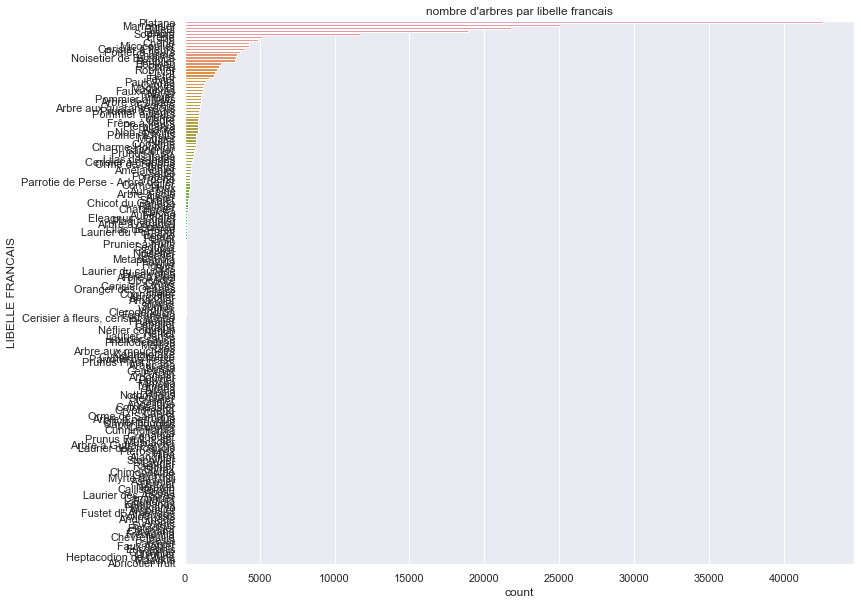

In [90]:
sns.countplot(y='LIBELLE FRANCAIS', data=data, order = data['LIBELLE FRANCAIS'].value_counts().index).set_title('nombre d\'arbres par libelle francais')

In [91]:
data['LIBELLE FRANCAIS'].value_counts()

Platane                 42587
Marronnier              25112
Tilleul                 21798
Erable                  18886
Sophora                 11753
                        ...  
Cordyline                   1
Jujubier                    1
Heptacodion de Chine        1
Maackie                     1
Abricotier fruit            1
Name: LIBELLE FRANCAIS, Length: 184, dtype: int64

* Certains LIBELLE FRANCAIS concentrent énormément de données
* Il peut être intéressant de filtrer ceux n'ayant que peu d'arbres

In [92]:
sub_libfr = data[data['LIBELLE FRANCAIS'].map(data['LIBELLE FRANCAIS'].value_counts()) > 2000]

In [93]:
sub_libfr['LIBELLE FRANCAIS'].value_counts()

Platane                 42587
Marronnier              25112
Tilleul                 21798
Erable                  18886
Sophora                 11753
Frêne                    5125
Pin                      4920
Chêne                    4307
Micocoulier              4294
Cerisier à fleurs        3990
Poirier à fleurs         3698
Charme                   3453
Noisetier de Byzance     3396
Peuplier                 3319
Bouleau                  2398
Orme                     2308
Robinier                 2145
If                       2047
Name: LIBELLE FRANCAIS, dtype: int64

In [94]:
sub_libfr['LIBELLE FRANCAIS'].value_counts().sum()

165536

Text(0.5, 1.0, "nombre d'arbres par libelle francais les plus representés")

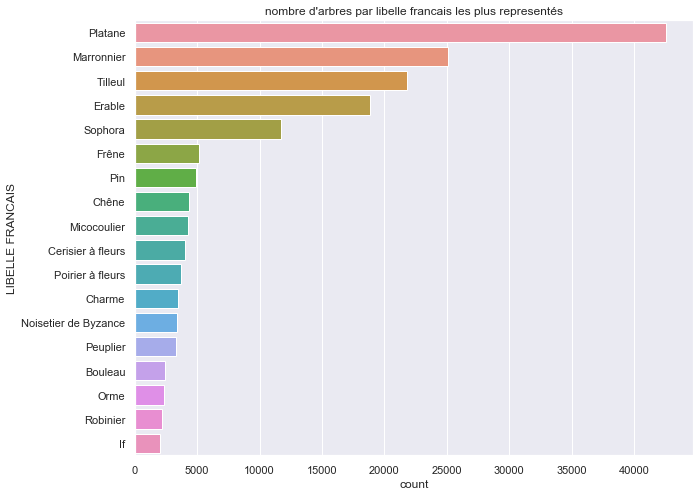

In [95]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(y='LIBELLE FRANCAIS', data=sub_libfr, order = sub_libfr['LIBELLE FRANCAIS'].value_counts().index).set_title('nombre d\'arbres par libelle francais les plus representés')

> ### ESPECE

Text(0.5, 1.0, "nombre d'arbres par espece")

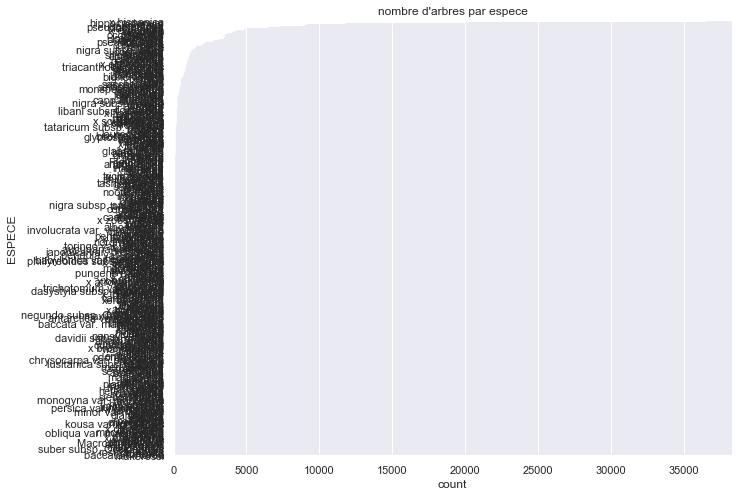

In [96]:
sns.countplot(y='ESPECE', data=data, order = data['ESPECE'].value_counts().index).set_title('nombre d\'arbres par espece')

In [97]:
data['ESPECE'].value_counts()

x hispanica         36457
hippocastanum       19994
japonica            11734
n. sp.               9185
tomentosa            8947
                    ...  
rosmarinifolia          1
prunifolia              1
koreana                 1
baccata f. Aurea        1
mukorossi               1
Name: ESPECE, Length: 429, dtype: int64

* Certaines ESPECE concentrent énormément de données
* Il peut être intéressant de filtrer celles n'ayant que peu d'arbres

In [98]:
sub_espece = data[data['ESPECE'].map(data['ESPECE'].value_counts()) > 2000]
sub_espece['ESPECE'].value_counts()

x hispanica       36457
hippocastanum     19994
japonica          11734
n. sp.             9185
tomentosa          8947
pseudoplatanus     7316
platanoides        6393
nigra              4922
x europaea         4841
x carnea           4300
australis          4137
cordata            3985
excelsior          3693
occidentalis       3450
betulus            3433
colurna            3396
calleryana         3377
platyphyllos       3062
orientalis         2694
serrulata          2600
pseudoacacia       2102
baccata            2052
Name: ESPECE, dtype: int64

Text(0.5, 1.0, "nombre d'arbres par espèce les plus representées")

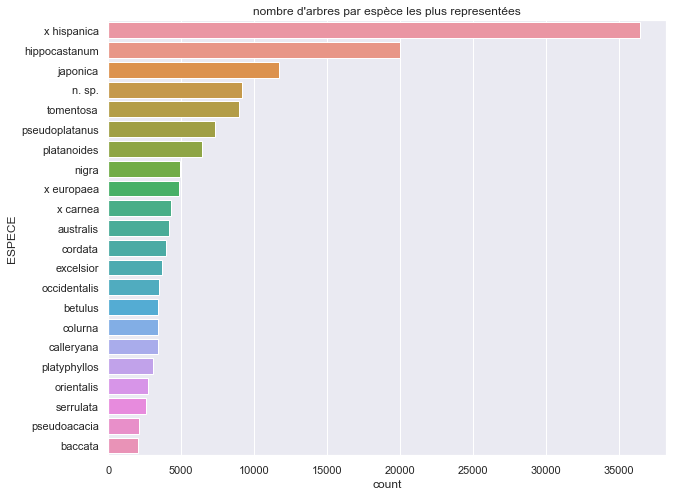

In [99]:
sns.countplot(y='ESPECE', data=sub_espece, order = sub_espece['ESPECE'].value_counts().index).set_title('nombre d\'arbres par espèce les plus representées')

> ### STADE DE DEVELOPPEMENT

Text(0.5, 1.0, "nombre d'arbres par stade de developpement")

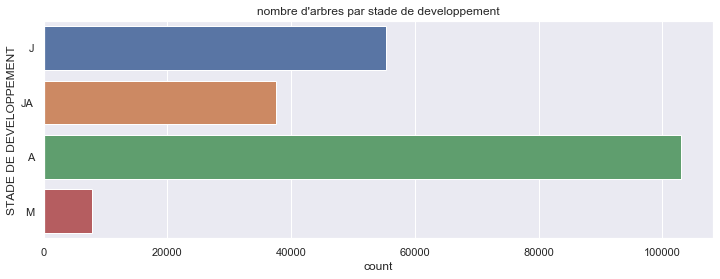

In [100]:
sns.set(rc={'figure.figsize':(12,4)})
sns.countplot(y='STADE DE DEVELOPPEMENT', data=data, order=('J','JA','A','M')).set_title("nombre d'arbres par stade de developpement")

## Liens entre les variables
---

> ### liens avec la HAUTEUR

#### HAUTEUR et CIRCONFERENCE

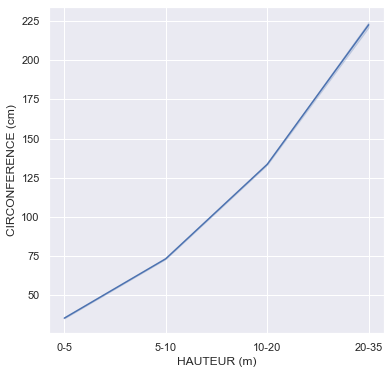

In [101]:
sns.set(rc={'figure.figsize':(6,6)})
sns.lineplot(y='CIRCONFERENCE (cm)', x=haut_cut, data=data)

* La circonférence est correlée à la hauteur
* Plus un arbre est grand et plus sa circonférence l'est aussi (logique)

#### HAUTEUR et ARRONDISSEMENT

Text(0.5, 1.0, "nombre d'arbres par arrondissement par catégorie de hauteur")

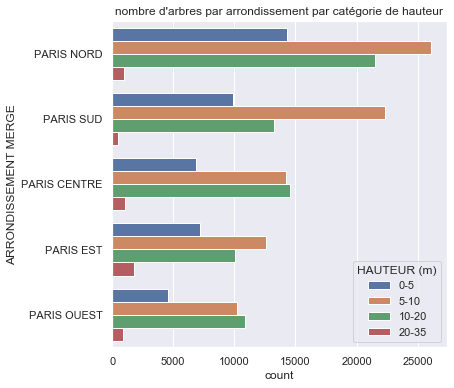

In [102]:
sns.countplot(y='ARRONDISSEMENT MERGE', hue=haut_cut, data=data, order = data['ARRONDISSEMENT MERGE'].value_counts().index).set_title('nombre d\'arbres par arrondissement par catégorie de hauteur')

#### HAUTEUR et LIBELLE FRANCAIS

Text(0.5, 1.0, "nombre d'arbres par arrondissement par catégorie de hauteur")

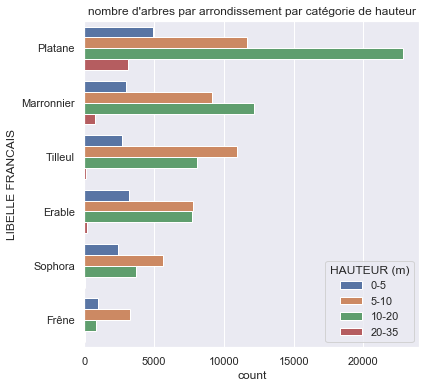

In [103]:
sub_libfr = data[data['LIBELLE FRANCAIS'].map(data['LIBELLE FRANCAIS'].value_counts()) > 5000]
sns.countplot(y='LIBELLE FRANCAIS', hue=haut_cut, data=sub_libfr, order = sub_libfr['LIBELLE FRANCAIS'].value_counts().index).set_title('nombre d\'arbres par arrondissement par catégorie de hauteur')

#### HAUTEUR et STADE DE DEVELOPPEMENT

Text(0.5, 1.0, "nombre d'arbres par stade de developpement par catégorie de hauteur")

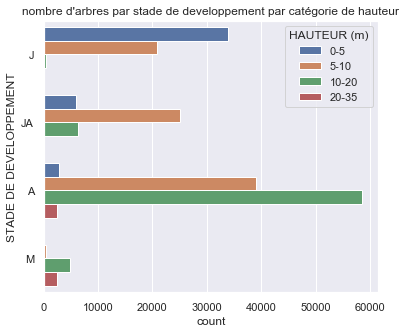

In [104]:
sns.set(rc={'figure.figsize':(6,5)})
sns.countplot(y='STADE DE DEVELOPPEMENT', hue=haut_cut, data=data, order=('J','JA','A','M')).set_title("nombre d'arbres par stade de developpement par catégorie de hauteur")

* On voit bien le lien entre le stade de developpement d'un arbre et sa hauteur (logique)
  * les **J**eunes font majoritairement entre (0 et 5m)
  * les **J**eunes **A**rbres font majoritairement entre (0 et 10m)
  * les arbres **A**dultes font majoritairement entre (10 et 20m)
  * les arbres **M**atures font majoritairement entre (10 et 20m) et aussi (20 et 35m)

> ### liens avec LIBELLE FRANCAIS

#### LIBELLE FRANCAIS et ESPECE

Text(0.5, 1.0, 'lien entre LIBELLE FRANCAIS et ESPECE')

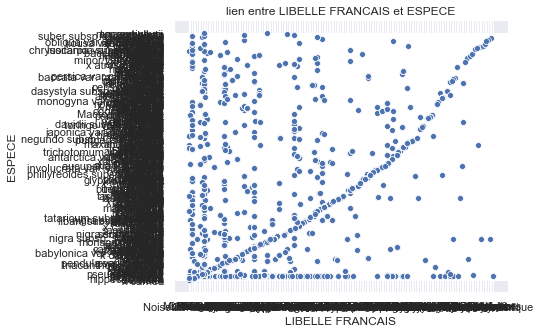

In [105]:
sns.set(rc={'figure.figsize':(6,5)})
sns.scatterplot(x=data['LIBELLE FRANCAIS'], y=data['ESPECE']).set_title("lien entre LIBELLE FRANCAIS et ESPECE")

* les LIBELLE FRANCAIS et les ESPECE sont corrélés
* Certaines ESPECEs ont plusieurs LIBELLE FRANCAIS ce qui est sans doute une erreur
* Certains LIBELLE FRANCAIS ont plusieurs ESPECE ce qui est logique selon la classification en vigueur

## Conclusion de l'analyse des données
---

* **Les données réellement utiles à l'optimation des trajets sont :**
  * les ARRONDISSEMENTs
  * la HAUTEUR
 
 
* **Nous pouvons écarter les donnnées qui sont étroitement corrélées :**
  * CIRCONFERENCE (avec HAUTEUR)
  * STADE DE DEVELOPPEMENT (avec HAUTEUR)
  * ESPECE (avec LIBELLE FRANCAIS)


* **Nous pouvons écarter les LIBELLE FRANCAIS**
  * nous pourrions établir une stratégie basé sur ces LIBELLE car il y a de grandes disparités de représentation
  * ex : le Platane est de loin le plus representé de tous, on pourrait commencer par lui
  * mais en admettant qu'il n'y a pas de différence majeure d'entretien entre les différents LIBELLE FRANCAIS
  * nous lui préfererons la HAUTEUR comme critère discriminant d'optimisation


* **Stratégie envisagée :** 
  * établir la carte par arrondissement du nombre d'arbres par catégorie de hauteurs
  * entretenir un arbre de moins de 5 mètres et un autre arbre de 15 mètres ne représente pas le même effort (ressource matérielle et humaine)
  * plus l'arbre est petit et plus il est facile à entretenir

## Utilisation des coordonnées GPS (Folium)
---

> ### construction des données à afficher sur la carte

In [106]:
df = pd.DataFrame()

list_arr = data['ARRONDISSEMENT'].unique()

tab = []
for arr in list_arr:
    tab.append(data[data['ARRONDISSEMENT'] == arr]['ARRONDISSEMENT'].value_counts().values[0])

df['ARRONDISSEMENT'] = list_arr
df['TOTAL'] = tab

df    

,ARRONDISSEMENT,TOTAL
0,PARIS 16E ARRDT,16983
1,PARIS 14E ARRDT,11965
2,PARIS 6E ARRDT,1760
3,SEINE-SAINT-DENIS,11614
4,PARIS 18E ARRDT,10409
5,PARIS 12E ARRDT,12485
6,BOIS DE VINCENNES,11553
7,PARIS 15E ARRDT,17290
8,PARIS 17E ARRDT,10998
9,PARIS 3E ARRDT,1243


In [107]:
# nombre de HAUTEUR par ARRONDISSEMENT réparties en catégorie
sub_data = data.groupby(['ARRONDISSEMENT', haut_cut])['HAUTEUR (m)'].count()

for index, value in sub_data.items():
    df.loc[df[df['ARRONDISSEMENT'] == index[0]].index.values[0],index[1]] = value
    df[index[1]] = df[index[1]].dropna().astype(int)

df

,ARRONDISSEMENT,TOTAL,0-5,5-10,10-20,20-35
0,PARIS 16E ARRDT,16983,3413,6059,6848,663
1,PARIS 14E ARRDT,11965,3002,5381,3409,173
2,PARIS 6E ARRDT,1760,177,815,722,46
3,SEINE-SAINT-DENIS,11614,1468,5570,4505,71
4,PARIS 18E ARRDT,10409,2868,4413,2977,151
5,PARIS 12E ARRDT,12485,4523,5324,2502,136
6,BOIS DE VINCENNES,11553,1562,4407,4769,815
7,PARIS 15E ARRDT,17290,2357,9273,5541,119
8,PARIS 17E ARRDT,10998,2411,4996,3543,48
9,PARIS 3E ARRDT,1243,254,572,394,23


In [108]:
# merge des arrondissements (à cause du fichier GeoJSON)
## BOIS DE BOULOGNE + 16eme
## BOIS DE VINCENNES + 12eme
count_bdb_total = df[df['ARRONDISSEMENT'] == 'BOIS DE BOULOGNE']['TOTAL'].values[0]
count_bdb_0_5 = df[df['ARRONDISSEMENT'] == 'BOIS DE BOULOGNE']['0-5'].values[0]
count_bdb_5_10 = df[df['ARRONDISSEMENT'] == 'BOIS DE BOULOGNE']['5-10'].values[0]
count_bdb_10_20 = df[df['ARRONDISSEMENT'] == 'BOIS DE BOULOGNE']['10-20'].values[0]
count_bdb_20_35 = df[df['ARRONDISSEMENT'] == 'BOIS DE BOULOGNE']['20-35'].values[0]

count_bdv_total = df[df['ARRONDISSEMENT'] == 'BOIS DE VINCENNES']['TOTAL'].values[0]
count_bdv_0_5 = df[df['ARRONDISSEMENT'] == 'BOIS DE VINCENNES']['0-5'].values[0]
count_bdv_5_10 = df[df['ARRONDISSEMENT'] == 'BOIS DE VINCENNES']['5-10'].values[0]
count_bdv_10_20 = df[df['ARRONDISSEMENT'] == 'BOIS DE VINCENNES']['10-20'].values[0]
count_bdv_20_35 = df[df['ARRONDISSEMENT'] == 'BOIS DE VINCENNES']['20-35'].values[0]

for index in df.index:
    if df.loc[index,'ARRONDISSEMENT'] == 'PARIS 16E ARRDT':
        df.loc[index,'TOTAL'] += count_bdb_total
        df.loc[index,'0-5'] += count_bdb_0_5
        df.loc[index,'5-10'] += count_bdb_5_10
        df.loc[index,'10-20'] += count_bdb_10_20
        df.loc[index,'20-35'] += count_bdb_20_35
    elif df.loc[index,'ARRONDISSEMENT'] == 'PARIS 12E ARRDT':
        df.loc[index,'TOTAL'] += count_bdv_total
        df.loc[index,'0-5'] += count_bdv_0_5
        df.loc[index,'5-10'] += count_bdv_5_10
        df.loc[index,'10-20'] += count_bdv_10_20
        df.loc[index,'20-35'] += count_bdv_20_35
        
df = df.drop(df[df['ARRONDISSEMENT'] == 'BOIS DE BOULOGNE'].index)
df = df.drop(df[df['ARRONDISSEMENT'] == 'BOIS DE VINCENNES'].index)

df

,ARRONDISSEMENT,TOTAL,0-5,5-10,10-20,20-35
0,PARIS 16E ARRDT,21059,4023,7927,8250,859
1,PARIS 14E ARRDT,11965,3002,5381,3409,173
2,PARIS 6E ARRDT,1760,177,815,722,46
3,SEINE-SAINT-DENIS,11614,1468,5570,4505,71
4,PARIS 18E ARRDT,10409,2868,4413,2977,151
5,PARIS 12E ARRDT,24038,6085,9731,7271,951
7,PARIS 15E ARRDT,17290,2357,9273,5541,119
8,PARIS 17E ARRDT,10998,2411,4996,3543,48
9,PARIS 3E ARRDT,1243,254,572,394,23
10,PARIS 10E ARRDT,3424,616,1353,1272,183


In [109]:
# coordonées GPS de Paris
gps = [
['PARIS 1ER ARRDT',[48.8612, 2.3400]],
['PARIS 2E ARRDT', [48.8685, 2.3426]],
['PARIS 3E ARRDT', [48.8626834, 2.3586851]],
['PARIS 4E ARRDT', [48.8559595, 2.357211]],
['PARIS 5E ARRDT', [48.84106831699862, 2.351225012774507]],
['PARIS 6E ARRDT', [48.8493919, 2.3322597]],
['PARIS 7E ARRDT', [48.8549137, 2.3128597]],
['PARIS 8E ARRDT', [48.8736011, 2.312613]],
['PARIS 9E ARRDT', [48.877352, 2.3369122]],
['PARIS 10E ARRDT', [48.874530238587894, 2.3576736238342466]],
['PARIS 11E ARRDT', [48.8589453, 2.377997]],
['PARIS 12E ARRDT', [48.83889987179538, 2.3960803453956603]],
['PARIS 13E ARRDT', [48.826997, 2.3633959]],
['PARIS 14E ARRDT', [48.8300, 2.3283317]],
['PARIS 15E ARRDT', [48.8363015, 2.2926809]],
['PARIS 16E ARRDT', [48.8564994, 2.2648522]],
['PARIS 17E ARRDT', [48.887439, 2.3065229]],
['PARIS 18E ARRDT', [48.8923676, 2.3434118]],
['PARIS 19E ARRDT', [48.8827146, 2.3837753]],
['PARIS 20E ARRDT', [48.8618271, 2.4010731]],
['SEINE-SAINT-DENIS', [48.9098125, 2.4528635]],
['VAL-DE-MARNE', [48.7744894, 2.4543321]],
['HAUTS-DE-SEINE', [48.8401859, 2.1986412]]
]

#ajout des coordonnées dans le DatFrame
for arr, coordonnees in gps:
    df.loc[df[df['ARRONDISSEMENT'] == arr].index.values[0],'GPS'] = str(coordonnees[0])+','+str(coordonnees[1])
    
df

,ARRONDISSEMENT,TOTAL,0-5,5-10,10-20,20-35,GPS
0,PARIS 16E ARRDT,21059,4023,7927,8250,859,"48.8564994,2.2648522"
1,PARIS 14E ARRDT,11965,3002,5381,3409,173,"48.83,2.3283317"
2,PARIS 6E ARRDT,1760,177,815,722,46,"48.8493919,2.3322597"
3,SEINE-SAINT-DENIS,11614,1468,5570,4505,71,"48.9098125,2.4528635"
4,PARIS 18E ARRDT,10409,2868,4413,2977,151,"48.8923676,2.3434118"
5,PARIS 12E ARRDT,24038,6085,9731,7271,951,"48.83889987179538,2.3960803453956605"
7,PARIS 15E ARRDT,17290,2357,9273,5541,119,"48.8363015,2.2926809"
8,PARIS 17E ARRDT,10998,2411,4996,3543,48,"48.887439,2.3065229"
9,PARIS 3E ARRDT,1243,254,572,394,23,"48.8626834,2.3586851"
10,PARIS 10E ARRDT,3424,616,1353,1272,183,"48.874530238587894,2.3576736238342466"


> ### carte du nombre TOTAL d'arbres par ARRONDISSEMENT

In [110]:
arrondissements = os.path.join('data', 'arrondissements.geojson')

m = folium.Map(location=[48.8534, 2.3488], zoom_start=11, tiles='openstreetmap')

folium.Choropleth(
    geo_data=arrondissements,
    name='nombre TOTAL d\'arbres par ARRONDISSEMENT',
    data=df,
    columns=['ARRONDISSEMENT', 'TOTAL'],
    key_on='feature.properties.l_ar',
    fill_color='BuGn',
    fill_opacity=0.75,
    line_opacity=0.7,
    nan_fill_color = '#cccccc',
    line_color = 'gray'
).add_to(m)


for index in df.index:
    info = df.loc[index,'ARRONDISSEMENT']+ ' - ' + str(df.loc[index,'TOTAL']) + ' arbres'
    folium.Marker(df.loc[index,'GPS'].split(','),tooltip=info,icon = folium.Icon(color='green',icon='fa-tree', prefix='fa')).add_to(m)

m

> ### carte des arbres faisant entre 0 et 5 mètres de HAUTEUR par ARRONDISSEMENT

In [111]:
arrondissements = os.path.join('data', 'arrondissements.geojson')

m = folium.Map(location=[48.8534, 2.3488], zoom_start=11, tiles='openstreetmap')

folium.Choropleth(
    geo_data=arrondissements,
    name='arbres faisant entre 0 et 5 mètres de HAUTEUR par ARRONDISSEMENT',
    data=df,
    columns=['ARRONDISSEMENT', '0-5'],
    key_on='feature.properties.l_ar',
    fill_color='BuGn',
    fill_opacity=0.75,
    line_opacity=0.7,
    nan_fill_color = '#cccccc',
    line_color = 'gray'
).add_to(m)


for index in df.index:
    info = df.loc[index,'ARRONDISSEMENT']+ ' - ' + str(df.loc[index,'0-5']) + ' arbres'
    folium.Marker(df.loc[index,'GPS'].split(','),tooltip=info,icon = folium.Icon(color='green',icon='fa-tree', prefix='fa')).add_to(m)

m

> ### carte des arbres faisant entre 5 et 10 mètres de HAUTEUR par ARRONDISSEMENT

In [112]:
arrondissements = os.path.join('data', 'arrondissements.geojson')

m = folium.Map(location=[48.8534, 2.3488], zoom_start=11, tiles='openstreetmap')

folium.Choropleth(
    geo_data=arrondissements,
    name='arbres faisant entre 5 et 10 mètres de HAUTEUR par ARRONDISSEMENT',
    data=df,
    columns=['ARRONDISSEMENT', '5-10'],
    key_on='feature.properties.l_ar',
    fill_color='BuGn',
    fill_opacity=0.75,
    line_opacity=0.7,
    nan_fill_color = '#cccccc',
    line_color = 'gray'
).add_to(m)


for index in df.index:
    info = df.loc[index,'ARRONDISSEMENT']+ ' - ' + str(df.loc[index,'5-10']) + ' arbres'
    folium.Marker(df.loc[index,'GPS'].split(','),tooltip=info,icon = folium.Icon(color='green',icon='fa-tree', prefix='fa')).add_to(m)

m

> ### carte des arbres faisant entre 10 et 20 mètres de HAUTEUR par ARRONDISSEMENT

In [113]:
arrondissements = os.path.join('data', 'arrondissements.geojson')

m = folium.Map(location=[48.8534, 2.3488], zoom_start=11, tiles='openstreetmap')

folium.Choropleth(
    geo_data=arrondissements,
    name='arbres faisant entre 10 et 20 mètres de HAUTEUR par ARRONDISSEMENT',
    data=df,
    columns=['ARRONDISSEMENT', '10-20'],
    key_on='feature.properties.l_ar',
    fill_color='BuGn',
    fill_opacity=0.75,
    line_opacity=0.7,
    nan_fill_color = '#cccccc',
    line_color = 'gray'
).add_to(m)


for index in df.index:
    info = df.loc[index,'ARRONDISSEMENT']+ ' - ' + str(df.loc[index,'10-20']) + ' arbres'
    folium.Marker(df.loc[index,'GPS'].split(','),tooltip=info,icon = folium.Icon(color='green',icon='fa-tree', prefix='fa')).add_to(m)

m

> ### carte des arbres faisant entre 20 et 35 mètres de HAUTEUR par ARRONDISSEMENT

In [114]:
arrondissements = os.path.join('data', 'arrondissements.geojson')

m = folium.Map(location=[48.8534, 2.3488], zoom_start=11, tiles='openstreetmap')

folium.Choropleth(
    geo_data=arrondissements,
    name='arbres faisant entre 20 et 35 mètres de HAUTEUR par ARRONDISSEMENT',
    data=df,
    columns=['ARRONDISSEMENT', '20-35'],
    key_on='feature.properties.l_ar',
    fill_color='BuGn',
    fill_opacity=0.75,
    line_opacity=0.7,
    nan_fill_color = '#cccccc',
    line_color = 'gray'
).add_to(m)


for index in df.index:
    info = df.loc[index,'ARRONDISSEMENT']+ ' - ' + str(df.loc[index,'20-35']) + ' arbres'
    folium.Marker(df.loc[index,'GPS'].split(','),tooltip=info,icon = folium.Icon(color='green',icon='fa-tree', prefix='fa')).add_to(m)

m

# - Hypothèses finales & validation

## Hypothèses
---

* **HYOTHESE 1** : la localisation des arbres influence le parcours
  * il est plus intéressant de traiter des arbres proches entre eux et de suivre un itinéraire minimisant les déplacements


* **HYPOTHESE 2** : la hauteur des arbres influence leur entretien
  * il est plus intéressant de traiter en priorité des arbres nécessitant plus d'entretien
  * plus un arbre est grand et plus il consomme de ressources (matérielles et humaines) pour être entretenu
  * les arbres d'une même catégorie de hauteur ont le même temps d'entretien, peu importe leur LIBELE FRANCAIS / ESPECE
  * il y a 4 catégories de hauteur:
    * les arbres entre 0 et 5 mètres
    * les arbres entre 5 et 10 mètres
    * les arbres entre 10 et 20 mètres
    * les arbres entre 20 et 35 mètres

> ### Hypothèse 1

* **NOMBRE d'arbres par arrondissement** (du plus nombreux au moins nombreux)

Text(0.5, 1.0, "nombre d'arbres par arrondissement")

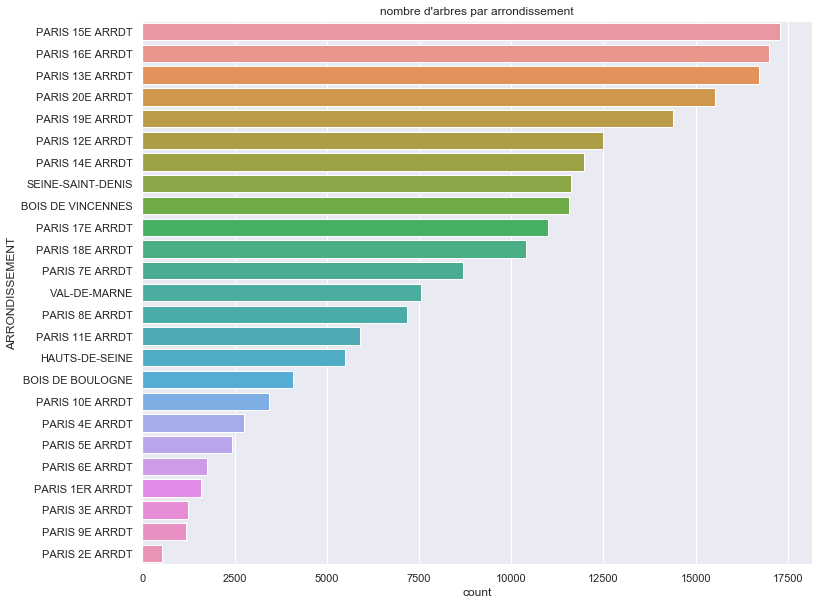

In [115]:
sns.set(rc={'figure.figsize':(12,10)})
sns.countplot(y='ARRONDISSEMENT', data=data, order = data['ARRONDISSEMENT'].value_counts().index).set_title('nombre d\'arbres par arrondissement')

> ### Hypothèse 2

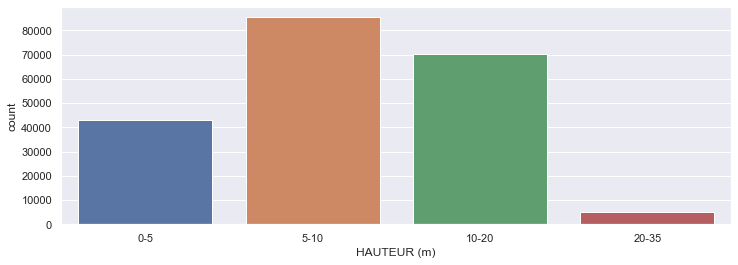

In [116]:
sns.set(rc={'figure.figsize':(12,4)})
sns.countplot(x=haut_cut)

In [117]:
round(haut_cut.value_counts()/len(haut_cut),2)

5-10     0.42
10-20    0.34
0-5      0.21
20-35    0.03
Name: HAUTEUR (m), dtype: float64

* **ORDRE SUGGERE de traitement des arbres** (du plus long au moins long)
  * entre 10 et 20 mètres
  * entre 5 et 10 mètres
  * entre 0 et 5 mètres
  * entre 20 et 35 mètres

## - Validation des hypothèses
---

> ### Construction des données finales

In [118]:
dffinal = pd.DataFrame()

list_arr = df['ARRONDISSEMENT'].unique()
list_haut_cut = haut_cut.unique()

index = 0
for arr in list_arr:
    for cat in list_haut_cut:
        dffinal.loc[index, 'ARRONDISSEMENT'] = arr
        dffinal.loc[index, 'HAUTEUR'] = cat
        dffinal.loc[index, 'TOTAL'] = df[(df['ARRONDISSEMENT'] == arr)][cat].values[0]
        index +=1
       
dffinal

,ARRONDISSEMENT,HAUTEUR,TOTAL
0,PARIS 16E ARRDT,5-10,7927.0
1,PARIS 16E ARRDT,10-20,8250.0
2,PARIS 16E ARRDT,0-5,4023.0
3,PARIS 16E ARRDT,20-35,859.0
4,PARIS 14E ARRDT,5-10,5381.0
...,...,...,...
87,PARIS 2E ARRDT,20-35,7.0
88,PARIS 1ER ARRDT,5-10,650.0
89,PARIS 1ER ARRDT,10-20,272.0
90,PARIS 1ER ARRDT,0-5,659.0


> ### Nombres d'arbres par ARRONDISSEMENT par HAUTEUR (non triés)

Text(0.5, 1.0, "nombre d'arbres par arrondissement par catégorie de hauteur")

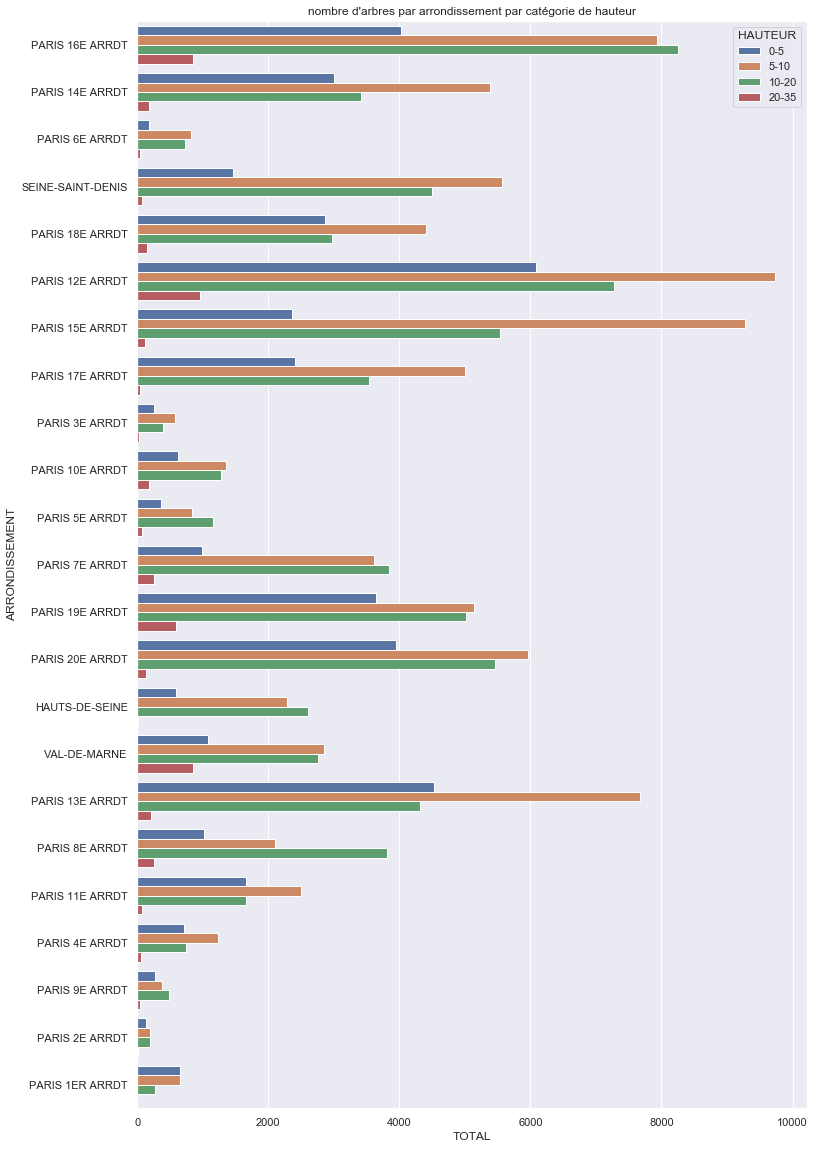

In [119]:
sns.set(rc={'figure.figsize':(12,20)})
sns.barplot(x='TOTAL', y='ARRONDISSEMENT', hue='HAUTEUR', hue_order=('0-5','5-10','10-20','20-35'),  data=dffinal).set_title('nombre d\'arbres par arrondissement par catégorie de hauteur')

* un premier tri peut-être fait en se basant uniquement sur le nombre total d'arbres par ARRONDISSEMENT

> ### Nombres d'arbres par ARRONDISSEMENT par HAUTEUR (triés)

In [120]:
order = ('PARIS 15E ARRDT',
          'PARIS 14E ARRDT',
          'PARIS 13E ARRDT',
          'VAL-DE-MARNE',
          'PARIS 12E ARRDT',
          'PARIS 20E ARRDT',
          'PARIS 19E ARRDT',
          'PARIS 18E ARRDT',
          'SEINE-SAINT-DENIS',
          'PARIS 17E ARRDT',
          'HAUTS-DE-SEINE',
          'PARIS 16E ARRDT',
          'PARIS 7E ARRDT',
          'PARIS 8E ARRDT',
          'PARIS 9E ARRDT',
          'PARIS 10E ARRDT',
          'PARIS 11E ARRDT',
          'PARIS 4E ARRDT',
          'PARIS 3E ARRDT',
          'PARIS 2E ARRDT',
          'PARIS 1ER ARRDT'
         )  

Text(0.5, 1.0, "nombre d'arbres par arrondissement par catégorie de hauteur")

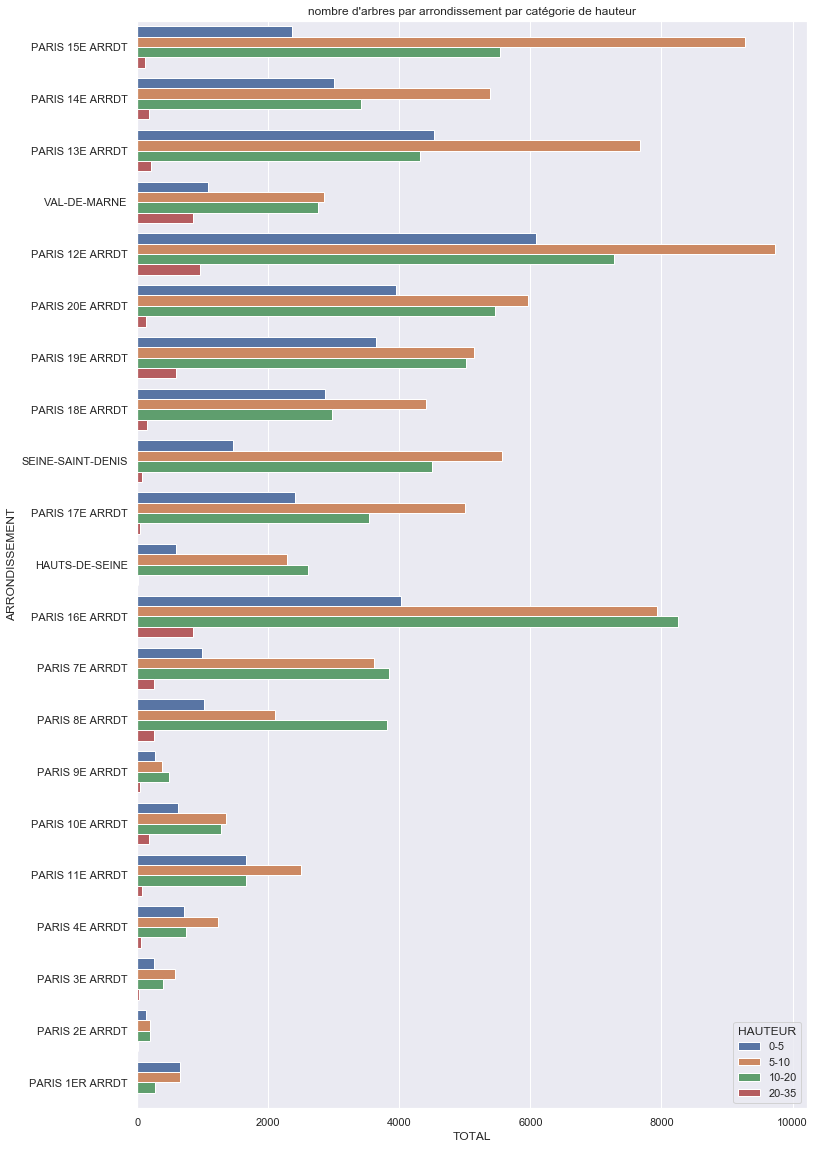

In [121]:
sns.set(rc={'figure.figsize':(12,20)})
sns.barplot(x='TOTAL', y='ARRONDISSEMENT', hue='HAUTEUR', hue_order=('0-5','5-10','10-20','20-35'),  order =order, data=dffinal).set_title('nombre d\'arbres par arrondissement par catégorie de hauteur')

> ### Validation de l'hypothèse 1

In [122]:
points_arr = [
['PARIS 1ER ARRDT',(48.8612, 2.3400)],
['PARIS 2E ARRDT', (48.8685, 2.3426)],
['PARIS 3E ARRDT', (48.8626834, 2.3586851)],
['PARIS 4E ARRDT', (48.8559595, 2.357211)],
['PARIS 5E ARRDT', (48.84106831699862, 2.351225012774507)],
['PARIS 6E ARRDT', (48.8493919, 2.3322597)],
['PARIS 7E ARRDT', (48.8549137, 2.3128597)],
['PARIS 8E ARRDT', (48.8736011, 2.312613)],
['PARIS 9E ARRDT', (48.877352, 2.3369122)],
['PARIS 10E ARRDT', (48.874530238587894, 2.3576736238342466)],
['PARIS 11E ARRDT', (48.8589453, 2.377997)],
['PARIS 12E ARRDT', (48.83889987179538, 2.3960803453956603)],
['PARIS 13E ARRDT', (48.826997, 2.3633959)],
['PARIS 14E ARRDT', (48.8300, 2.3283317)],
['PARIS 15E ARRDT', (48.8363015, 2.2926809)],
['PARIS 16E ARRDT', (48.8564994, 2.2648522)],
['PARIS 17E ARRDT', (48.887439, 2.3065229)],
['PARIS 18E ARRDT', (48.8923676, 2.3434118)],
['PARIS 19E ARRDT', (48.8827146, 2.3837753)],
['PARIS 20E ARRDT', (48.8618271, 2.4010731)],
['SEINE-SAINT-DENIS', (48.9098125, 2.4528635)],
['VAL-DE-MARNE', (48.7744894, 2.4543321)],
['HAUTS-DE-SEINE', (48.8401859, 2.1986412)]
]

In [123]:
points = []
for arr_sort in order:
    for arr, gps in points_arr:
         if arr == arr_sort:
                points.append(gps)

In [124]:
arrondissements = os.path.join('data', 'arrondissements.geojson')

m = folium.Map(location=[48.8534, 2.3488], zoom_start=11, tiles='openstreetmap')

folium.Choropleth(
    geo_data=arrondissements,
    name='nombre TOTAL d\'arbres par ARRONDISSEMENT',
    data=df,
    columns=['ARRONDISSEMENT', 'TOTAL'],
    key_on='feature.properties.l_ar',
    fill_color='BuGn',
    fill_opacity=0.75,
    line_opacity=0.7,
    nan_fill_color = '#cccccc',
    line_color = 'gray'
).add_to(m)


folium.Marker(list(points[0]),tooltip='DEPART',icon = folium.Icon(color='green',icon='fa-play', prefix='fa')).add_to(m)
folium.Marker(list(points[-1]),tooltip='ARRIVEE',icon = folium.Icon(color='green',icon='fa-stop', prefix='fa')).add_to(m)

folium.PolyLine(points, color='black').add_to(m)

m

* le trajet est cohérent et valide l'hypothèse 1
* en revanche, valide-t-il l'hypothèse 2 ?

Text(0.5, 1.0, "nombre d'arbres par arrondissement par catégorie de hauteur")

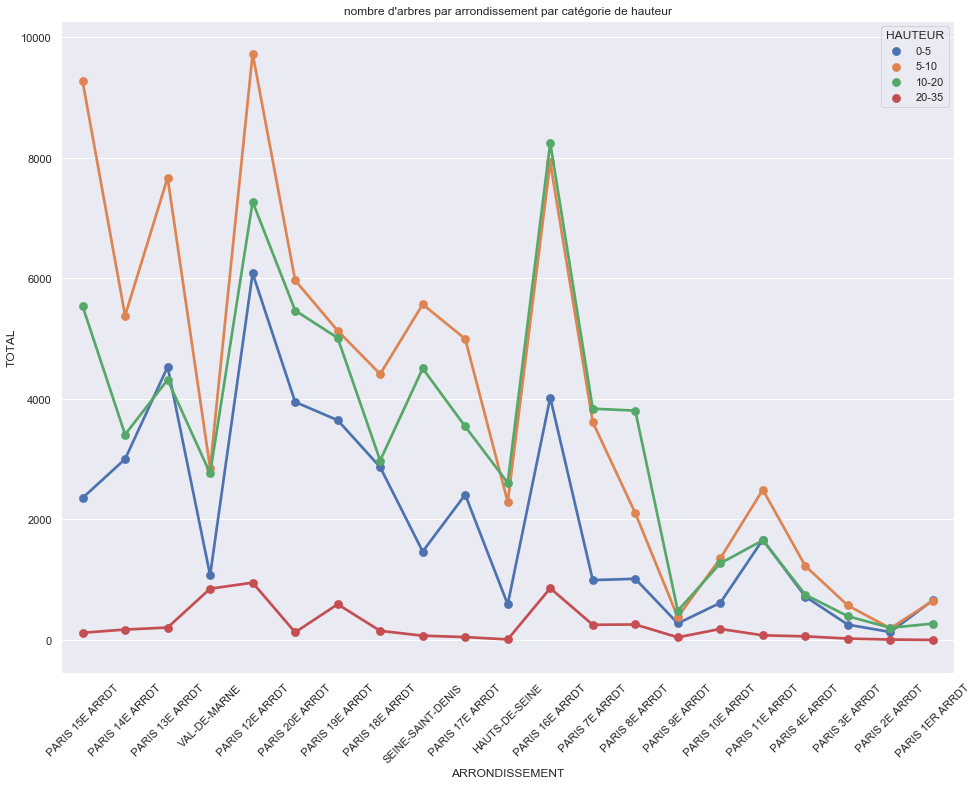

In [125]:
sns.set(rc={'figure.figsize':(16,12)})
plt.xticks(rotation=45)
sns.pointplot(y='TOTAL', x='ARRONDISSEMENT', hue='HAUTEUR', hue_order=('0-5','5-10','10-20','20-35'),  order=order, data=dffinal).set_title('nombre d\'arbres par arrondissement par catégorie de hauteur')

* l'hypothèse 2 n'est pas validée car on remarque nettement un pic pour le 16eme ARRONDISSEMENT pour les HAUTEUR 
  * entre 10 et 20 mètres
  * entre 5 et 10 mètres
  * entre 0 et 5 mètres

> ### Validation de l'hypothèse 2

* bien que le 16ème ARRONDISSEMENT ait moins d'arbre que le 15eme, il est préférable de commencer par lui pour éviter une charge plus grande de travail en plein milieu de l'entretien 
* et donc il vaut mieux en réalité commencer par les HAUTS-DE-SEINE qui seront rapidement entretenues avant de commencer le 16eme
* ce qui nous force aussi à revoir l'ordre après le 17eme

In [126]:
order = ('HAUTS-DE-SEINE',
          'PARIS 16E ARRDT',
          'PARIS 15E ARRDT',
          'PARIS 14E ARRDT',
          'PARIS 13E ARRDT',
          'VAL-DE-MARNE',
          'PARIS 12E ARRDT',
          'PARIS 20E ARRDT',
          'PARIS 19E ARRDT',
          'PARIS 18E ARRDT',
          'SEINE-SAINT-DENIS',
          'PARIS 17E ARRDT',
          'PARIS 8E ARRDT', 
          'PARIS 7E ARRDT',
          'PARIS 9E ARRDT',
          'PARIS 10E ARRDT',
          'PARIS 11E ARRDT',
          'PARIS 4E ARRDT',
          'PARIS 3E ARRDT',
          'PARIS 2E ARRDT',
          'PARIS 1ER ARRDT'
         ) 

points = []
for arr_sort in order:
    for arr, gps in points_arr:
         if arr == arr_sort:
                points.append(gps)

In [127]:
arrondissements = os.path.join('data', 'arrondissements.geojson')

m = folium.Map(location=[48.8534, 2.3488], zoom_start=11, tiles='openstreetmap')

folium.Choropleth(
    geo_data=arrondissements,
    name='nombre TOTAL d\'arbres par ARRONDISSEMENT',
    data=df,
    columns=['ARRONDISSEMENT', '10-20'],
    key_on='feature.properties.l_ar',
    fill_color='BuGn',
    fill_opacity=0.75,
    line_opacity=0.7,
    nan_fill_color = '#cccccc',
    line_color = 'gray'
).add_to(m)


folium.Marker(list(points[0]),tooltip='DEPART',icon = folium.Icon(color='green',icon='fa-play', prefix='fa')).add_to(m)
folium.Marker(list(points[-1]),tooltip='ARRIVEE',icon = folium.Icon(color='green',icon='fa-stop', prefix='fa')).add_to(m)

folium.PolyLine(points, color='black').add_to(m)

m

Text(0.5, 1.0, "nombre d'arbres par arrondissement par catégorie de hauteur")

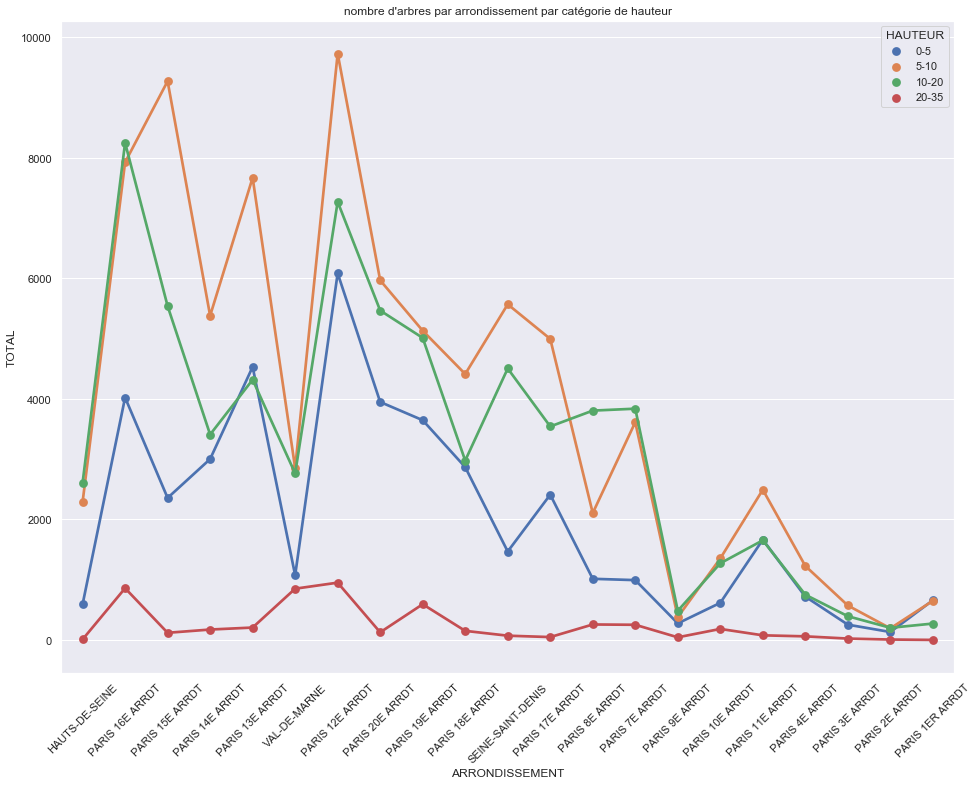

In [128]:
sns.set(rc={'figure.figsize':(16,12)})
plt.xticks(rotation=45)
sns.pointplot(y='TOTAL', x='ARRONDISSEMENT', hue='HAUTEUR', hue_order=('0-5','5-10','10-20','20-35'),  order=order, data=dffinal).set_title('nombre d\'arbres par arrondissement par catégorie de hauteur')

* la plus grande charge de travail est bien au début du trajet puis elle va en diminuant
* l'hypothèse 2 est validée